In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from keras.models import Model
from keras.callbacks import TensorBoard
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json


input_encoder = Input(shape=(28, 28, 1))
input_decoder = Input(shape=(4, 4, 4))

with open('decoder.json', 'r') as f:
    decoder = model_from_json(f.read())
    decoder.load_weights("decoder.h5")
    
with open('encoder.json', 'r') as f:
    encoder = model_from_json(f.read())
    encoder.load_weights("encoder.h5")
    
with open('autoencoder.json', 'r') as f:
    autoencoder = model_from_json(f.read())
    autoencoder.load_weights("autoencoder.h5")

/home/ganimedes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


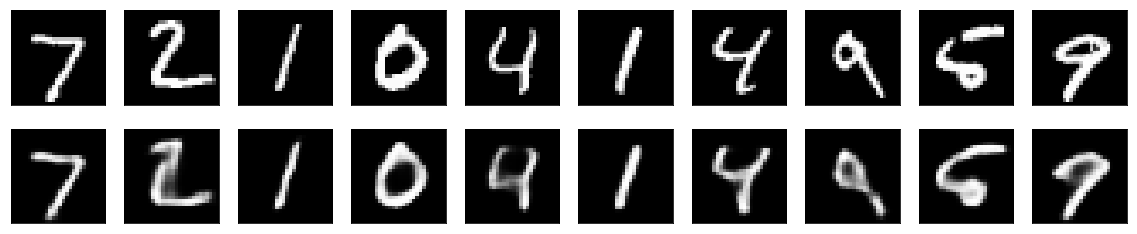

In [2]:
(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
data_x = encoder.predict(x_train)

0 [D loss: 0.767596, acc.: 50.00%] [G loss: 1.316769]


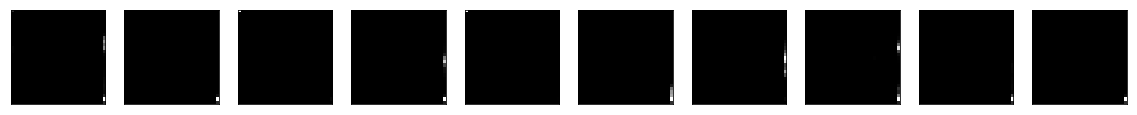

1 [D loss: 0.667505, acc.: 52.34%] [G loss: 1.386803]
2 [D loss: 0.599067, acc.: 67.97%] [G loss: 1.501432]
3 [D loss: 0.552077, acc.: 79.69%] [G loss: 1.578171]
4 [D loss: 0.483651, acc.: 95.31%] [G loss: 1.616454]
5 [D loss: 0.433709, acc.: 99.22%] [G loss: 1.695850]
6 [D loss: 0.393565, acc.: 99.22%] [G loss: 1.753313]
7 [D loss: 0.378625, acc.: 99.22%] [G loss: 1.792817]
8 [D loss: 0.357723, acc.: 100.00%] [G loss: 1.820542]
9 [D loss: 0.347378, acc.: 100.00%] [G loss: 1.791727]
10 [D loss: 0.367273, acc.: 98.44%] [G loss: 1.755282]
11 [D loss: 0.415835, acc.: 95.31%] [G loss: 1.783022]
12 [D loss: 0.457082, acc.: 89.84%] [G loss: 1.686872]
13 [D loss: 0.539583, acc.: 77.34%] [G loss: 1.567721]
14 [D loss: 0.668678, acc.: 54.69%] [G loss: 1.450458]
15 [D loss: 0.745863, acc.: 45.31%] [G loss: 1.303373]
16 [D loss: 0.874720, acc.: 31.25%] [G loss: 1.164404]
17 [D loss: 0.907586, acc.: 29.69%] [G loss: 1.089621]
18 [D loss: 0.911880, acc.: 21.88%] [G loss: 1.116910]
19 [D loss: 0.851

153 [D loss: 0.713033, acc.: 45.31%] [G loss: 0.782572]
154 [D loss: 0.710114, acc.: 42.19%] [G loss: 0.808460]
155 [D loss: 0.668431, acc.: 45.31%] [G loss: 0.833495]
156 [D loss: 0.612123, acc.: 61.72%] [G loss: 0.870022]
157 [D loss: 0.613949, acc.: 65.62%] [G loss: 0.852278]
158 [D loss: 0.586996, acc.: 69.53%] [G loss: 0.862524]
159 [D loss: 0.577935, acc.: 69.53%] [G loss: 0.840858]
160 [D loss: 0.625178, acc.: 55.47%] [G loss: 0.827353]
161 [D loss: 0.625280, acc.: 53.12%] [G loss: 0.816834]
162 [D loss: 0.669586, acc.: 52.34%] [G loss: 0.789983]
163 [D loss: 0.662680, acc.: 48.44%] [G loss: 0.775440]
164 [D loss: 0.696652, acc.: 42.97%] [G loss: 0.809250]
165 [D loss: 0.710168, acc.: 38.28%] [G loss: 0.821381]
166 [D loss: 0.656000, acc.: 45.31%] [G loss: 0.842192]
167 [D loss: 0.663573, acc.: 43.75%] [G loss: 0.826962]
168 [D loss: 0.660265, acc.: 47.66%] [G loss: 0.832857]
169 [D loss: 0.650048, acc.: 58.59%] [G loss: 0.875179]
170 [D loss: 0.718591, acc.: 48.44%] [G loss: 0.

300 [D loss: 0.642415, acc.: 68.75%] [G loss: 0.904674]
301 [D loss: 0.650537, acc.: 71.09%] [G loss: 0.881208]
302 [D loss: 0.668093, acc.: 53.91%] [G loss: 0.887161]
303 [D loss: 0.659437, acc.: 60.16%] [G loss: 0.872348]
304 [D loss: 0.667780, acc.: 58.59%] [G loss: 0.855848]
305 [D loss: 0.668286, acc.: 57.81%] [G loss: 0.888889]
306 [D loss: 0.637250, acc.: 67.97%] [G loss: 0.894413]
307 [D loss: 0.637839, acc.: 66.41%] [G loss: 0.887297]
308 [D loss: 0.672195, acc.: 53.91%] [G loss: 0.879611]
309 [D loss: 0.666305, acc.: 57.03%] [G loss: 0.872159]
310 [D loss: 0.659787, acc.: 60.16%] [G loss: 0.897076]
311 [D loss: 0.639657, acc.: 69.53%] [G loss: 0.885508]
312 [D loss: 0.650960, acc.: 64.84%] [G loss: 0.875965]
313 [D loss: 0.654380, acc.: 64.06%] [G loss: 0.855602]
314 [D loss: 0.642212, acc.: 73.44%] [G loss: 0.885966]
315 [D loss: 0.663108, acc.: 65.62%] [G loss: 0.889142]
316 [D loss: 0.647060, acc.: 64.84%] [G loss: 0.848513]
317 [D loss: 0.695292, acc.: 60.16%] [G loss: 0.

450 [D loss: 0.632462, acc.: 65.62%] [G loss: 0.887389]
451 [D loss: 0.636066, acc.: 71.88%] [G loss: 0.868759]
452 [D loss: 0.621113, acc.: 67.97%] [G loss: 0.879099]
453 [D loss: 0.618122, acc.: 68.75%] [G loss: 0.880372]
454 [D loss: 0.617336, acc.: 67.97%] [G loss: 0.891390]
455 [D loss: 0.621235, acc.: 69.53%] [G loss: 0.898805]
456 [D loss: 0.642307, acc.: 63.28%] [G loss: 0.866920]
457 [D loss: 0.636140, acc.: 69.53%] [G loss: 0.887686]
458 [D loss: 0.605946, acc.: 76.56%] [G loss: 0.893203]
459 [D loss: 0.655533, acc.: 60.16%] [G loss: 0.890290]
460 [D loss: 0.618506, acc.: 65.62%] [G loss: 0.874198]
461 [D loss: 0.595911, acc.: 74.22%] [G loss: 0.862057]
462 [D loss: 0.614514, acc.: 70.31%] [G loss: 0.860407]
463 [D loss: 0.615868, acc.: 67.97%] [G loss: 0.852305]
464 [D loss: 0.616786, acc.: 71.88%] [G loss: 0.862135]
465 [D loss: 0.607617, acc.: 70.31%] [G loss: 0.854549]
466 [D loss: 0.638103, acc.: 57.81%] [G loss: 0.878771]
467 [D loss: 0.613050, acc.: 73.44%] [G loss: 0.

598 [D loss: 0.657681, acc.: 56.25%] [G loss: 0.892596]
599 [D loss: 0.630751, acc.: 64.84%] [G loss: 0.904766]
600 [D loss: 0.650485, acc.: 69.53%] [G loss: 0.898395]
601 [D loss: 0.657738, acc.: 64.06%] [G loss: 0.941817]
602 [D loss: 0.639554, acc.: 65.62%] [G loss: 0.922596]
603 [D loss: 0.645075, acc.: 60.16%] [G loss: 0.973653]
604 [D loss: 0.663491, acc.: 61.72%] [G loss: 0.877568]
605 [D loss: 0.657168, acc.: 65.62%] [G loss: 0.922348]
606 [D loss: 0.646253, acc.: 64.06%] [G loss: 0.880166]
607 [D loss: 0.659830, acc.: 57.03%] [G loss: 0.885072]
608 [D loss: 0.654142, acc.: 59.38%] [G loss: 0.866043]
609 [D loss: 0.659053, acc.: 64.06%] [G loss: 0.899718]
610 [D loss: 0.645055, acc.: 64.84%] [G loss: 0.870672]
611 [D loss: 0.657825, acc.: 63.28%] [G loss: 0.892210]
612 [D loss: 0.626457, acc.: 68.75%] [G loss: 0.861337]
613 [D loss: 0.668255, acc.: 60.94%] [G loss: 0.835388]
614 [D loss: 0.632151, acc.: 71.09%] [G loss: 0.864100]
615 [D loss: 0.620702, acc.: 66.41%] [G loss: 0.

747 [D loss: 0.661143, acc.: 65.62%] [G loss: 0.866133]
748 [D loss: 0.657255, acc.: 65.62%] [G loss: 0.852099]
749 [D loss: 0.657567, acc.: 63.28%] [G loss: 0.867597]
750 [D loss: 0.641102, acc.: 69.53%] [G loss: 0.843725]
751 [D loss: 0.656673, acc.: 67.19%] [G loss: 0.908942]
752 [D loss: 0.638356, acc.: 67.97%] [G loss: 0.887211]
753 [D loss: 0.675500, acc.: 66.41%] [G loss: 0.917992]
754 [D loss: 0.652666, acc.: 65.62%] [G loss: 0.893621]
755 [D loss: 0.656697, acc.: 66.41%] [G loss: 0.884571]
756 [D loss: 0.663747, acc.: 60.94%] [G loss: 0.846654]
757 [D loss: 0.690700, acc.: 54.69%] [G loss: 0.831419]
758 [D loss: 0.669116, acc.: 59.38%] [G loss: 0.850053]
759 [D loss: 0.681485, acc.: 58.59%] [G loss: 0.862136]
760 [D loss: 0.656554, acc.: 64.06%] [G loss: 0.824514]
761 [D loss: 0.669244, acc.: 61.72%] [G loss: 0.840323]
762 [D loss: 0.694364, acc.: 49.22%] [G loss: 0.849162]
763 [D loss: 0.662963, acc.: 63.28%] [G loss: 0.850213]
764 [D loss: 0.655996, acc.: 67.19%] [G loss: 0.

897 [D loss: 0.621420, acc.: 73.44%] [G loss: 1.171399]
898 [D loss: 0.671092, acc.: 60.16%] [G loss: 0.957342]
899 [D loss: 0.632250, acc.: 64.84%] [G loss: 1.129479]
900 [D loss: 0.634845, acc.: 67.19%] [G loss: 1.155717]
901 [D loss: 0.625851, acc.: 67.97%] [G loss: 1.246553]
902 [D loss: 0.635775, acc.: 66.41%] [G loss: 1.063331]
903 [D loss: 0.635724, acc.: 71.09%] [G loss: 1.260861]
904 [D loss: 0.634218, acc.: 66.41%] [G loss: 1.180517]
905 [D loss: 0.635766, acc.: 66.41%] [G loss: 1.073012]
906 [D loss: 0.621052, acc.: 75.78%] [G loss: 1.101892]
907 [D loss: 0.627992, acc.: 69.53%] [G loss: 1.208344]
908 [D loss: 0.612121, acc.: 73.44%] [G loss: 1.279546]
909 [D loss: 0.644278, acc.: 63.28%] [G loss: 1.245036]
910 [D loss: 0.643329, acc.: 61.72%] [G loss: 1.155452]
911 [D loss: 0.613621, acc.: 75.78%] [G loss: 1.198344]
912 [D loss: 0.625282, acc.: 62.50%] [G loss: 1.169089]
913 [D loss: 0.607410, acc.: 72.66%] [G loss: 1.266017]
914 [D loss: 0.646687, acc.: 64.84%] [G loss: 1.

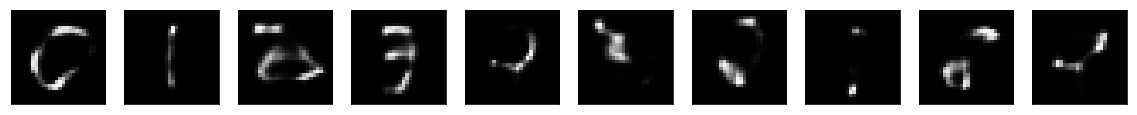

1001 [D loss: 0.149423, acc.: 98.44%] [G loss: 3.406865]
1002 [D loss: 0.329603, acc.: 82.81%] [G loss: 2.318812]
1003 [D loss: 0.149267, acc.: 97.66%] [G loss: 3.693659]
1004 [D loss: 0.254266, acc.: 89.84%] [G loss: 2.484916]
1005 [D loss: 0.146237, acc.: 100.00%] [G loss: 3.475498]
1006 [D loss: 0.290007, acc.: 86.72%] [G loss: 2.366391]
1007 [D loss: 0.140534, acc.: 100.00%] [G loss: 3.617082]
1008 [D loss: 0.373663, acc.: 81.25%] [G loss: 2.383183]
1009 [D loss: 0.178098, acc.: 97.66%] [G loss: 3.907943]
1010 [D loss: 0.327491, acc.: 82.81%] [G loss: 2.479631]
1011 [D loss: 0.158505, acc.: 100.00%] [G loss: 3.544715]
1012 [D loss: 0.294360, acc.: 88.28%] [G loss: 2.470778]
1013 [D loss: 0.148380, acc.: 99.22%] [G loss: 3.520681]
1014 [D loss: 0.228701, acc.: 90.62%] [G loss: 2.582996]
1015 [D loss: 0.110832, acc.: 100.00%] [G loss: 3.582148]
1016 [D loss: 0.293451, acc.: 86.72%] [G loss: 2.467162]
1017 [D loss: 0.178678, acc.: 96.88%] [G loss: 3.319979]
1018 [D loss: 0.292849, acc

1151 [D loss: 0.529028, acc.: 74.22%] [G loss: 3.662518]
1152 [D loss: 0.542523, acc.: 67.19%] [G loss: 3.699064]
1153 [D loss: 0.504884, acc.: 75.78%] [G loss: 3.182098]
1154 [D loss: 0.703274, acc.: 65.62%] [G loss: 2.848168]
1155 [D loss: 0.372341, acc.: 85.16%] [G loss: 3.383906]
1156 [D loss: 0.530305, acc.: 71.88%] [G loss: 2.809362]
1157 [D loss: 0.358302, acc.: 87.50%] [G loss: 3.653359]
1158 [D loss: 0.479250, acc.: 75.78%] [G loss: 2.757038]
1159 [D loss: 0.373064, acc.: 85.16%] [G loss: 3.192182]
1160 [D loss: 0.484708, acc.: 75.00%] [G loss: 2.746710]
1161 [D loss: 0.412413, acc.: 80.47%] [G loss: 3.918692]
1162 [D loss: 0.562737, acc.: 70.31%] [G loss: 3.183195]
1163 [D loss: 0.521362, acc.: 70.31%] [G loss: 3.442965]
1164 [D loss: 0.652478, acc.: 65.62%] [G loss: 2.685399]
1165 [D loss: 0.531781, acc.: 76.56%] [G loss: 3.222202]
1166 [D loss: 0.626033, acc.: 67.97%] [G loss: 2.957173]
1167 [D loss: 0.489369, acc.: 78.12%] [G loss: 2.910811]
1168 [D loss: 0.460775, acc.: 7

1298 [D loss: 0.695974, acc.: 54.69%] [G loss: 0.949934]
1299 [D loss: 0.693823, acc.: 56.25%] [G loss: 0.925119]
1300 [D loss: 0.664399, acc.: 62.50%] [G loss: 0.903125]
1301 [D loss: 0.690962, acc.: 54.69%] [G loss: 0.947802]
1302 [D loss: 0.673933, acc.: 57.03%] [G loss: 0.898015]
1303 [D loss: 0.688714, acc.: 52.34%] [G loss: 0.897563]
1304 [D loss: 0.682781, acc.: 55.47%] [G loss: 0.905234]
1305 [D loss: 0.681491, acc.: 58.59%] [G loss: 0.908316]
1306 [D loss: 0.686905, acc.: 50.78%] [G loss: 0.920855]
1307 [D loss: 0.681156, acc.: 62.50%] [G loss: 0.924983]
1308 [D loss: 0.692534, acc.: 54.69%] [G loss: 0.896040]
1309 [D loss: 0.688411, acc.: 56.25%] [G loss: 0.896786]
1310 [D loss: 0.681340, acc.: 56.25%] [G loss: 0.917443]
1311 [D loss: 0.674060, acc.: 57.03%] [G loss: 0.919926]
1312 [D loss: 0.664763, acc.: 64.06%] [G loss: 0.916829]
1313 [D loss: 0.673368, acc.: 53.12%] [G loss: 0.895278]
1314 [D loss: 0.681198, acc.: 59.38%] [G loss: 0.884604]
1315 [D loss: 0.665707, acc.: 6

1443 [D loss: 0.686228, acc.: 57.81%] [G loss: 0.879413]
1444 [D loss: 0.668778, acc.: 57.03%] [G loss: 0.853289]
1445 [D loss: 0.671154, acc.: 57.81%] [G loss: 0.851307]
1446 [D loss: 0.674275, acc.: 58.59%] [G loss: 0.856633]
1447 [D loss: 0.685259, acc.: 50.00%] [G loss: 0.869314]
1448 [D loss: 0.678740, acc.: 53.91%] [G loss: 0.846945]
1449 [D loss: 0.667439, acc.: 59.38%] [G loss: 0.865117]
1450 [D loss: 0.691375, acc.: 46.09%] [G loss: 0.840662]
1451 [D loss: 0.694836, acc.: 51.56%] [G loss: 0.836900]
1452 [D loss: 0.666514, acc.: 57.81%] [G loss: 0.846595]
1453 [D loss: 0.669059, acc.: 58.59%] [G loss: 0.851505]
1454 [D loss: 0.678123, acc.: 57.81%] [G loss: 0.844882]
1455 [D loss: 0.670917, acc.: 57.81%] [G loss: 0.853901]
1456 [D loss: 0.687454, acc.: 52.34%] [G loss: 0.843963]
1457 [D loss: 0.684482, acc.: 55.47%] [G loss: 0.840943]
1458 [D loss: 0.694396, acc.: 50.78%] [G loss: 0.826199]
1459 [D loss: 0.679428, acc.: 53.91%] [G loss: 0.828430]
1460 [D loss: 0.671680, acc.: 5

1588 [D loss: 0.672793, acc.: 55.47%] [G loss: 0.844087]
1589 [D loss: 0.689648, acc.: 52.34%] [G loss: 0.856815]
1590 [D loss: 0.653496, acc.: 62.50%] [G loss: 0.854919]
1591 [D loss: 0.654218, acc.: 66.41%] [G loss: 0.825841]
1592 [D loss: 0.668756, acc.: 54.69%] [G loss: 0.830190]
1593 [D loss: 0.667895, acc.: 64.84%] [G loss: 0.820014]
1594 [D loss: 0.694927, acc.: 54.69%] [G loss: 0.833389]
1595 [D loss: 0.672254, acc.: 61.72%] [G loss: 0.816088]
1596 [D loss: 0.676659, acc.: 54.69%] [G loss: 0.826885]
1597 [D loss: 0.689088, acc.: 58.59%] [G loss: 0.834887]
1598 [D loss: 0.696330, acc.: 52.34%] [G loss: 0.815364]
1599 [D loss: 0.678129, acc.: 61.72%] [G loss: 0.844035]
1600 [D loss: 0.693505, acc.: 50.00%] [G loss: 0.820879]
1601 [D loss: 0.658934, acc.: 64.06%] [G loss: 0.822180]
1602 [D loss: 0.672858, acc.: 58.59%] [G loss: 0.820269]
1603 [D loss: 0.677825, acc.: 57.03%] [G loss: 0.853301]
1604 [D loss: 0.677883, acc.: 55.47%] [G loss: 0.842238]
1605 [D loss: 0.681656, acc.: 5

1736 [D loss: 0.697161, acc.: 49.22%] [G loss: 0.803614]
1737 [D loss: 0.696412, acc.: 50.00%] [G loss: 0.800634]
1738 [D loss: 0.680094, acc.: 53.12%] [G loss: 0.802289]
1739 [D loss: 0.687893, acc.: 53.91%] [G loss: 0.793976]
1740 [D loss: 0.699695, acc.: 46.09%] [G loss: 0.812268]
1741 [D loss: 0.697834, acc.: 53.91%] [G loss: 0.820755]
1742 [D loss: 0.679310, acc.: 53.91%] [G loss: 0.810336]
1743 [D loss: 0.690361, acc.: 52.34%] [G loss: 0.832252]
1744 [D loss: 0.691534, acc.: 50.00%] [G loss: 0.800801]
1745 [D loss: 0.684728, acc.: 55.47%] [G loss: 0.808905]
1746 [D loss: 0.680573, acc.: 57.81%] [G loss: 0.816416]
1747 [D loss: 0.685675, acc.: 54.69%] [G loss: 0.816065]
1748 [D loss: 0.686091, acc.: 53.91%] [G loss: 0.815979]
1749 [D loss: 0.661031, acc.: 64.84%] [G loss: 0.812030]
1750 [D loss: 0.689686, acc.: 57.03%] [G loss: 0.811609]
1751 [D loss: 0.682441, acc.: 54.69%] [G loss: 0.812520]
1752 [D loss: 0.665840, acc.: 65.62%] [G loss: 0.821131]
1753 [D loss: 0.677149, acc.: 6

1883 [D loss: 0.687223, acc.: 53.12%] [G loss: 0.781858]
1884 [D loss: 0.670882, acc.: 62.50%] [G loss: 0.791519]
1885 [D loss: 0.683070, acc.: 57.81%] [G loss: 0.775386]
1886 [D loss: 0.667640, acc.: 57.03%] [G loss: 0.771460]
1887 [D loss: 0.686560, acc.: 53.91%] [G loss: 0.769811]
1888 [D loss: 0.685939, acc.: 58.59%] [G loss: 0.788544]
1889 [D loss: 0.720114, acc.: 40.62%] [G loss: 0.798732]
1890 [D loss: 0.677397, acc.: 55.47%] [G loss: 0.795249]
1891 [D loss: 0.688931, acc.: 54.69%] [G loss: 0.772441]
1892 [D loss: 0.674855, acc.: 61.72%] [G loss: 0.784742]
1893 [D loss: 0.697491, acc.: 49.22%] [G loss: 0.788817]
1894 [D loss: 0.675851, acc.: 57.81%] [G loss: 0.770813]
1895 [D loss: 0.674772, acc.: 58.59%] [G loss: 0.776623]
1896 [D loss: 0.675039, acc.: 61.72%] [G loss: 0.786714]
1897 [D loss: 0.688083, acc.: 52.34%] [G loss: 0.778198]
1898 [D loss: 0.689990, acc.: 56.25%] [G loss: 0.769129]
1899 [D loss: 0.672276, acc.: 56.25%] [G loss: 0.769743]
1900 [D loss: 0.678847, acc.: 6

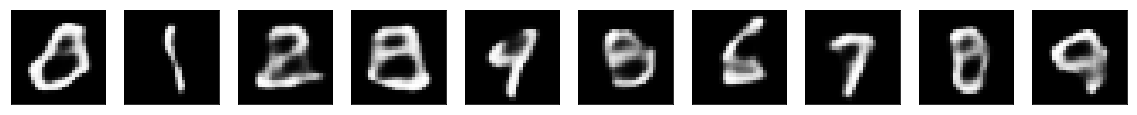

2001 [D loss: 0.684728, acc.: 57.81%] [G loss: 0.769784]
2002 [D loss: 0.682148, acc.: 58.59%] [G loss: 0.767369]
2003 [D loss: 0.686632, acc.: 54.69%] [G loss: 0.769665]
2004 [D loss: 0.672574, acc.: 64.06%] [G loss: 0.767233]
2005 [D loss: 0.693757, acc.: 47.66%] [G loss: 0.767381]
2006 [D loss: 0.673415, acc.: 60.94%] [G loss: 0.764809]
2007 [D loss: 0.684593, acc.: 57.03%] [G loss: 0.764835]
2008 [D loss: 0.684915, acc.: 54.69%] [G loss: 0.771055]
2009 [D loss: 0.684821, acc.: 53.12%] [G loss: 0.780001]
2010 [D loss: 0.681160, acc.: 52.34%] [G loss: 0.758316]
2011 [D loss: 0.679256, acc.: 56.25%] [G loss: 0.767891]
2012 [D loss: 0.694077, acc.: 58.59%] [G loss: 0.758676]
2013 [D loss: 0.679563, acc.: 59.38%] [G loss: 0.767470]
2014 [D loss: 0.671161, acc.: 60.94%] [G loss: 0.766344]
2015 [D loss: 0.675644, acc.: 60.94%] [G loss: 0.759583]
2016 [D loss: 0.677777, acc.: 61.72%] [G loss: 0.765818]
2017 [D loss: 0.683829, acc.: 57.03%] [G loss: 0.773088]
2018 [D loss: 0.677512, acc.: 6

2148 [D loss: 0.679193, acc.: 52.34%] [G loss: 0.738897]
2149 [D loss: 0.682975, acc.: 57.03%] [G loss: 0.757672]
2150 [D loss: 0.687239, acc.: 51.56%] [G loss: 0.759117]
2151 [D loss: 0.688895, acc.: 48.44%] [G loss: 0.764082]
2152 [D loss: 0.689722, acc.: 55.47%] [G loss: 0.772874]
2153 [D loss: 0.667132, acc.: 61.72%] [G loss: 0.761413]
2154 [D loss: 0.682295, acc.: 53.12%] [G loss: 0.751209]
2155 [D loss: 0.692332, acc.: 50.00%] [G loss: 0.774915]
2156 [D loss: 0.705717, acc.: 48.44%] [G loss: 0.769786]
2157 [D loss: 0.683968, acc.: 55.47%] [G loss: 0.763496]
2158 [D loss: 0.685194, acc.: 52.34%] [G loss: 0.771842]
2159 [D loss: 0.692892, acc.: 51.56%] [G loss: 0.776066]
2160 [D loss: 0.673024, acc.: 61.72%] [G loss: 0.762942]
2161 [D loss: 0.686134, acc.: 51.56%] [G loss: 0.756098]
2162 [D loss: 0.687298, acc.: 56.25%] [G loss: 0.756891]
2163 [D loss: 0.689248, acc.: 54.69%] [G loss: 0.769929]
2164 [D loss: 0.673517, acc.: 63.28%] [G loss: 0.779591]
2165 [D loss: 0.677701, acc.: 6

2293 [D loss: 0.684667, acc.: 52.34%] [G loss: 0.752656]
2294 [D loss: 0.686407, acc.: 55.47%] [G loss: 0.756710]
2295 [D loss: 0.677809, acc.: 54.69%] [G loss: 0.765144]
2296 [D loss: 0.673777, acc.: 52.34%] [G loss: 0.757798]
2297 [D loss: 0.689911, acc.: 52.34%] [G loss: 0.764807]
2298 [D loss: 0.680163, acc.: 58.59%] [G loss: 0.764845]
2299 [D loss: 0.673886, acc.: 64.84%] [G loss: 0.747365]
2300 [D loss: 0.671566, acc.: 59.38%] [G loss: 0.748119]
2301 [D loss: 0.686698, acc.: 54.69%] [G loss: 0.759772]
2302 [D loss: 0.683994, acc.: 54.69%] [G loss: 0.758635]
2303 [D loss: 0.683363, acc.: 49.22%] [G loss: 0.771837]
2304 [D loss: 0.672682, acc.: 60.94%] [G loss: 0.767914]
2305 [D loss: 0.672774, acc.: 59.38%] [G loss: 0.784703]
2306 [D loss: 0.687896, acc.: 57.81%] [G loss: 0.756476]
2307 [D loss: 0.666833, acc.: 50.78%] [G loss: 0.764743]
2308 [D loss: 0.674474, acc.: 57.81%] [G loss: 0.758520]
2309 [D loss: 0.687996, acc.: 54.69%] [G loss: 0.760247]
2310 [D loss: 0.678449, acc.: 5

2437 [D loss: 0.680279, acc.: 58.59%] [G loss: 0.767165]
2438 [D loss: 0.672669, acc.: 63.28%] [G loss: 0.760276]
2439 [D loss: 0.686768, acc.: 59.38%] [G loss: 0.747653]
2440 [D loss: 0.690195, acc.: 54.69%] [G loss: 0.759033]
2441 [D loss: 0.680905, acc.: 54.69%] [G loss: 0.755899]
2442 [D loss: 0.678263, acc.: 59.38%] [G loss: 0.788580]
2443 [D loss: 0.679652, acc.: 65.62%] [G loss: 0.760313]
2444 [D loss: 0.675966, acc.: 54.69%] [G loss: 0.744331]
2445 [D loss: 0.682028, acc.: 57.03%] [G loss: 0.747257]
2446 [D loss: 0.681128, acc.: 57.03%] [G loss: 0.757283]
2447 [D loss: 0.684997, acc.: 50.78%] [G loss: 0.754407]
2448 [D loss: 0.667615, acc.: 61.72%] [G loss: 0.760874]
2449 [D loss: 0.693629, acc.: 50.00%] [G loss: 0.753886]
2450 [D loss: 0.681813, acc.: 56.25%] [G loss: 0.752054]
2451 [D loss: 0.677049, acc.: 58.59%] [G loss: 0.757740]
2452 [D loss: 0.687326, acc.: 50.78%] [G loss: 0.762044]
2453 [D loss: 0.679034, acc.: 59.38%] [G loss: 0.761176]
2454 [D loss: 0.680241, acc.: 5

2581 [D loss: 0.674700, acc.: 64.06%] [G loss: 0.750142]
2582 [D loss: 0.689352, acc.: 51.56%] [G loss: 0.752802]
2583 [D loss: 0.689114, acc.: 55.47%] [G loss: 0.746279]
2584 [D loss: 0.685803, acc.: 59.38%] [G loss: 0.758051]
2585 [D loss: 0.682874, acc.: 54.69%] [G loss: 0.756184]
2586 [D loss: 0.686154, acc.: 50.78%] [G loss: 0.749527]
2587 [D loss: 0.679874, acc.: 60.94%] [G loss: 0.745508]
2588 [D loss: 0.680372, acc.: 62.50%] [G loss: 0.765843]
2589 [D loss: 0.696618, acc.: 52.34%] [G loss: 0.782136]
2590 [D loss: 0.685812, acc.: 66.41%] [G loss: 0.799977]
2591 [D loss: 0.699371, acc.: 42.97%] [G loss: 0.781614]
2592 [D loss: 0.679572, acc.: 60.16%] [G loss: 0.783197]
2593 [D loss: 0.684844, acc.: 53.91%] [G loss: 0.763714]
2594 [D loss: 0.686849, acc.: 57.03%] [G loss: 0.756676]
2595 [D loss: 0.675592, acc.: 60.16%] [G loss: 0.768153]
2596 [D loss: 0.675958, acc.: 59.38%] [G loss: 0.783261]
2597 [D loss: 0.691170, acc.: 54.69%] [G loss: 0.751346]
2598 [D loss: 0.688353, acc.: 5

2728 [D loss: 0.689974, acc.: 50.00%] [G loss: 0.785737]
2729 [D loss: 0.695286, acc.: 50.00%] [G loss: 0.762001]
2730 [D loss: 0.694010, acc.: 53.91%] [G loss: 0.746257]
2731 [D loss: 0.681856, acc.: 59.38%] [G loss: 0.759745]
2732 [D loss: 0.678660, acc.: 58.59%] [G loss: 0.769946]
2733 [D loss: 0.682817, acc.: 60.94%] [G loss: 0.755905]
2734 [D loss: 0.678629, acc.: 56.25%] [G loss: 0.766350]
2735 [D loss: 0.686151, acc.: 55.47%] [G loss: 0.773341]
2736 [D loss: 0.689264, acc.: 55.47%] [G loss: 0.743910]
2737 [D loss: 0.685380, acc.: 59.38%] [G loss: 0.750828]
2738 [D loss: 0.688662, acc.: 54.69%] [G loss: 0.744988]
2739 [D loss: 0.675914, acc.: 59.38%] [G loss: 0.751654]
2740 [D loss: 0.681982, acc.: 55.47%] [G loss: 0.755010]
2741 [D loss: 0.693390, acc.: 58.59%] [G loss: 0.759452]
2742 [D loss: 0.695214, acc.: 48.44%] [G loss: 0.760579]
2743 [D loss: 0.692937, acc.: 48.44%] [G loss: 0.752594]
2744 [D loss: 0.681882, acc.: 64.06%] [G loss: 0.761032]
2745 [D loss: 0.683592, acc.: 5

2874 [D loss: 0.677560, acc.: 65.62%] [G loss: 0.754225]
2875 [D loss: 0.696102, acc.: 53.12%] [G loss: 0.771594]
2876 [D loss: 0.697521, acc.: 55.47%] [G loss: 0.780182]
2877 [D loss: 0.676926, acc.: 59.38%] [G loss: 0.780108]
2878 [D loss: 0.696457, acc.: 51.56%] [G loss: 0.767996]
2879 [D loss: 0.685727, acc.: 55.47%] [G loss: 0.766750]
2880 [D loss: 0.685561, acc.: 55.47%] [G loss: 0.760314]
2881 [D loss: 0.672279, acc.: 60.94%] [G loss: 0.750863]
2882 [D loss: 0.687472, acc.: 53.91%] [G loss: 0.753173]
2883 [D loss: 0.680539, acc.: 60.94%] [G loss: 0.764592]
2884 [D loss: 0.689395, acc.: 58.59%] [G loss: 0.751057]
2885 [D loss: 0.690449, acc.: 52.34%] [G loss: 0.765785]
2886 [D loss: 0.687052, acc.: 56.25%] [G loss: 0.760037]
2887 [D loss: 0.683269, acc.: 53.91%] [G loss: 0.766801]
2888 [D loss: 0.668695, acc.: 58.59%] [G loss: 0.750720]
2889 [D loss: 0.688319, acc.: 60.94%] [G loss: 0.765141]
2890 [D loss: 0.688211, acc.: 51.56%] [G loss: 0.745019]
2891 [D loss: 0.679673, acc.: 5

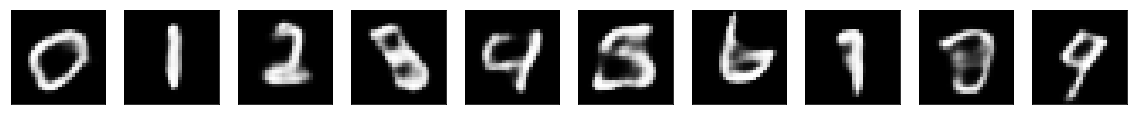

3001 [D loss: 0.677765, acc.: 62.50%] [G loss: 0.743342]
3002 [D loss: 0.685334, acc.: 56.25%] [G loss: 0.749879]
3003 [D loss: 0.692457, acc.: 53.91%] [G loss: 0.756149]
3004 [D loss: 0.681000, acc.: 64.84%] [G loss: 0.742390]
3005 [D loss: 0.687622, acc.: 59.38%] [G loss: 0.746063]
3006 [D loss: 0.678287, acc.: 58.59%] [G loss: 0.753015]
3007 [D loss: 0.679604, acc.: 56.25%] [G loss: 0.749716]
3008 [D loss: 0.676484, acc.: 60.94%] [G loss: 0.753922]
3009 [D loss: 0.679853, acc.: 55.47%] [G loss: 0.751207]
3010 [D loss: 0.678656, acc.: 56.25%] [G loss: 0.749242]
3011 [D loss: 0.679415, acc.: 53.91%] [G loss: 0.751254]
3012 [D loss: 0.674095, acc.: 61.72%] [G loss: 0.742572]
3013 [D loss: 0.682287, acc.: 52.34%] [G loss: 0.777338]
3014 [D loss: 0.674865, acc.: 57.81%] [G loss: 0.759339]
3015 [D loss: 0.679099, acc.: 60.94%] [G loss: 0.777823]
3016 [D loss: 0.684886, acc.: 54.69%] [G loss: 0.751672]
3017 [D loss: 0.682446, acc.: 63.28%] [G loss: 0.764618]
3018 [D loss: 0.674374, acc.: 6

3148 [D loss: 0.682876, acc.: 58.59%] [G loss: 0.732741]
3149 [D loss: 0.683520, acc.: 56.25%] [G loss: 0.728887]
3150 [D loss: 0.690120, acc.: 54.69%] [G loss: 0.733065]
3151 [D loss: 0.676723, acc.: 64.06%] [G loss: 0.738224]
3152 [D loss: 0.678059, acc.: 60.94%] [G loss: 0.745189]
3153 [D loss: 0.692041, acc.: 53.12%] [G loss: 0.769650]
3154 [D loss: 0.685024, acc.: 56.25%] [G loss: 0.740868]
3155 [D loss: 0.674626, acc.: 58.59%] [G loss: 0.739306]
3156 [D loss: 0.674955, acc.: 57.81%] [G loss: 0.747410]
3157 [D loss: 0.672806, acc.: 62.50%] [G loss: 0.752744]
3158 [D loss: 0.678075, acc.: 64.06%] [G loss: 0.749449]
3159 [D loss: 0.687582, acc.: 54.69%] [G loss: 0.746492]
3160 [D loss: 0.679928, acc.: 64.84%] [G loss: 0.752416]
3161 [D loss: 0.688179, acc.: 56.25%] [G loss: 0.755003]
3162 [D loss: 0.665320, acc.: 62.50%] [G loss: 0.771742]
3163 [D loss: 0.681835, acc.: 52.34%] [G loss: 0.770125]
3164 [D loss: 0.674123, acc.: 63.28%] [G loss: 0.758557]
3165 [D loss: 0.688765, acc.: 5

3295 [D loss: 0.681241, acc.: 54.69%] [G loss: 0.738981]
3296 [D loss: 0.673631, acc.: 63.28%] [G loss: 0.738748]
3297 [D loss: 0.683111, acc.: 57.81%] [G loss: 0.749818]
3298 [D loss: 0.693161, acc.: 55.47%] [G loss: 0.754516]
3299 [D loss: 0.676508, acc.: 60.94%] [G loss: 0.739672]
3300 [D loss: 0.674047, acc.: 62.50%] [G loss: 0.747010]
3301 [D loss: 0.692045, acc.: 54.69%] [G loss: 0.750175]
3302 [D loss: 0.684553, acc.: 57.81%] [G loss: 0.750615]
3303 [D loss: 0.682608, acc.: 59.38%] [G loss: 0.749196]
3304 [D loss: 0.686843, acc.: 55.47%] [G loss: 0.750430]
3305 [D loss: 0.687366, acc.: 52.34%] [G loss: 0.749256]
3306 [D loss: 0.678470, acc.: 57.03%] [G loss: 0.799130]
3307 [D loss: 0.686174, acc.: 58.59%] [G loss: 0.749646]
3308 [D loss: 0.677994, acc.: 64.06%] [G loss: 0.743333]
3309 [D loss: 0.680939, acc.: 60.16%] [G loss: 0.744824]
3310 [D loss: 0.685342, acc.: 58.59%] [G loss: 0.736313]
3311 [D loss: 0.683343, acc.: 58.59%] [G loss: 0.743683]
3312 [D loss: 0.680945, acc.: 5

3442 [D loss: 0.676678, acc.: 63.28%] [G loss: 0.755242]
3443 [D loss: 0.680641, acc.: 61.72%] [G loss: 0.733680]
3444 [D loss: 0.679942, acc.: 57.03%] [G loss: 0.732244]
3445 [D loss: 0.679527, acc.: 61.72%] [G loss: 0.741657]
3446 [D loss: 0.681750, acc.: 59.38%] [G loss: 0.750887]
3447 [D loss: 0.672701, acc.: 64.06%] [G loss: 0.751654]
3448 [D loss: 0.683923, acc.: 55.47%] [G loss: 0.751185]
3449 [D loss: 0.678833, acc.: 59.38%] [G loss: 0.749364]
3450 [D loss: 0.686764, acc.: 51.56%] [G loss: 0.735664]
3451 [D loss: 0.683494, acc.: 60.94%] [G loss: 0.718920]
3452 [D loss: 0.688553, acc.: 56.25%] [G loss: 0.740062]
3453 [D loss: 0.696219, acc.: 55.47%] [G loss: 0.726775]
3454 [D loss: 0.672157, acc.: 66.41%] [G loss: 0.742380]
3455 [D loss: 0.684261, acc.: 62.50%] [G loss: 0.733443]
3456 [D loss: 0.684634, acc.: 57.03%] [G loss: 0.753330]
3457 [D loss: 0.700883, acc.: 51.56%] [G loss: 0.751466]
3458 [D loss: 0.702348, acc.: 50.78%] [G loss: 0.758491]
3459 [D loss: 0.689629, acc.: 5

3588 [D loss: 0.678087, acc.: 58.59%] [G loss: 0.755633]
3589 [D loss: 0.681331, acc.: 53.12%] [G loss: 0.744768]
3590 [D loss: 0.677071, acc.: 57.03%] [G loss: 0.736329]
3591 [D loss: 0.667533, acc.: 64.84%] [G loss: 0.746401]
3592 [D loss: 0.676571, acc.: 64.84%] [G loss: 0.758214]
3593 [D loss: 0.673282, acc.: 58.59%] [G loss: 0.748122]
3594 [D loss: 0.675801, acc.: 57.81%] [G loss: 0.765709]
3595 [D loss: 0.684607, acc.: 57.03%] [G loss: 0.762878]
3596 [D loss: 0.684344, acc.: 55.47%] [G loss: 0.804456]
3597 [D loss: 0.676890, acc.: 58.59%] [G loss: 0.732391]
3598 [D loss: 0.681203, acc.: 59.38%] [G loss: 0.770633]
3599 [D loss: 0.687072, acc.: 47.66%] [G loss: 0.757412]
3600 [D loss: 0.684217, acc.: 55.47%] [G loss: 0.767052]
3601 [D loss: 0.688443, acc.: 53.91%] [G loss: 0.756501]
3602 [D loss: 0.681800, acc.: 57.81%] [G loss: 0.759256]
3603 [D loss: 0.692853, acc.: 53.91%] [G loss: 0.747314]
3604 [D loss: 0.670238, acc.: 66.41%] [G loss: 0.760520]
3605 [D loss: 0.671548, acc.: 6

3738 [D loss: 0.682628, acc.: 53.91%] [G loss: 0.752039]
3739 [D loss: 0.677727, acc.: 54.69%] [G loss: 0.758545]
3740 [D loss: 0.674364, acc.: 62.50%] [G loss: 0.742217]
3741 [D loss: 0.674582, acc.: 57.03%] [G loss: 0.749876]
3742 [D loss: 0.688493, acc.: 54.69%] [G loss: 0.759839]
3743 [D loss: 0.680618, acc.: 57.03%] [G loss: 0.739470]
3744 [D loss: 0.699676, acc.: 53.91%] [G loss: 0.739821]
3745 [D loss: 0.685745, acc.: 57.03%] [G loss: 0.745909]
3746 [D loss: 0.679733, acc.: 59.38%] [G loss: 0.733316]
3747 [D loss: 0.684549, acc.: 57.03%] [G loss: 0.746298]
3748 [D loss: 0.684523, acc.: 54.69%] [G loss: 0.736593]
3749 [D loss: 0.685996, acc.: 57.81%] [G loss: 0.746733]
3750 [D loss: 0.687325, acc.: 53.12%] [G loss: 0.739533]
3751 [D loss: 0.676533, acc.: 63.28%] [G loss: 0.738392]
3752 [D loss: 0.684607, acc.: 55.47%] [G loss: 0.746055]
3753 [D loss: 0.678205, acc.: 62.50%] [G loss: 0.754877]
3754 [D loss: 0.678288, acc.: 57.81%] [G loss: 0.748514]
3755 [D loss: 0.691355, acc.: 5

3883 [D loss: 0.673061, acc.: 52.34%] [G loss: 0.763838]
3884 [D loss: 0.681791, acc.: 60.16%] [G loss: 0.761937]
3885 [D loss: 0.695572, acc.: 55.47%] [G loss: 0.756017]
3886 [D loss: 0.681318, acc.: 62.50%] [G loss: 0.778394]
3887 [D loss: 0.686653, acc.: 57.03%] [G loss: 0.744598]
3888 [D loss: 0.677141, acc.: 57.81%] [G loss: 0.743981]
3889 [D loss: 0.692261, acc.: 53.91%] [G loss: 0.743041]
3890 [D loss: 0.677285, acc.: 63.28%] [G loss: 0.748345]
3891 [D loss: 0.669222, acc.: 58.59%] [G loss: 0.748654]
3892 [D loss: 0.663032, acc.: 67.97%] [G loss: 0.766941]
3893 [D loss: 0.687730, acc.: 57.81%] [G loss: 0.741633]
3894 [D loss: 0.685363, acc.: 60.94%] [G loss: 0.762624]
3895 [D loss: 0.687889, acc.: 54.69%] [G loss: 0.757006]
3896 [D loss: 0.676435, acc.: 67.97%] [G loss: 0.749881]
3897 [D loss: 0.677556, acc.: 58.59%] [G loss: 0.751284]
3898 [D loss: 0.664959, acc.: 69.53%] [G loss: 0.745053]
3899 [D loss: 0.676644, acc.: 59.38%] [G loss: 0.747043]
3900 [D loss: 0.670713, acc.: 6

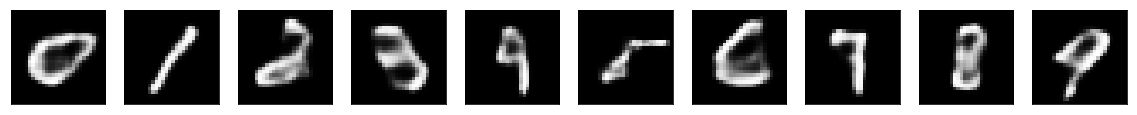

4001 [D loss: 0.681431, acc.: 62.50%] [G loss: 0.765852]
4002 [D loss: 0.680252, acc.: 62.50%] [G loss: 0.764534]
4003 [D loss: 0.673005, acc.: 68.75%] [G loss: 0.738090]
4004 [D loss: 0.672737, acc.: 58.59%] [G loss: 0.752144]
4005 [D loss: 0.690387, acc.: 56.25%] [G loss: 0.750439]
4006 [D loss: 0.675369, acc.: 60.94%] [G loss: 0.758516]
4007 [D loss: 0.673482, acc.: 59.38%] [G loss: 0.766045]
4008 [D loss: 0.683842, acc.: 51.56%] [G loss: 0.788894]
4009 [D loss: 0.682942, acc.: 57.03%] [G loss: 0.763440]
4010 [D loss: 0.676150, acc.: 63.28%] [G loss: 0.767732]
4011 [D loss: 0.678193, acc.: 59.38%] [G loss: 0.754032]
4012 [D loss: 0.679556, acc.: 60.16%] [G loss: 0.762033]
4013 [D loss: 0.680043, acc.: 61.72%] [G loss: 0.755474]
4014 [D loss: 0.671881, acc.: 63.28%] [G loss: 0.753560]
4015 [D loss: 0.679396, acc.: 57.03%] [G loss: 0.766541]
4016 [D loss: 0.681599, acc.: 61.72%] [G loss: 0.779168]
4017 [D loss: 0.676868, acc.: 64.06%] [G loss: 0.755811]
4018 [D loss: 0.682311, acc.: 5

4151 [D loss: 0.678687, acc.: 58.59%] [G loss: 0.738977]
4152 [D loss: 0.685105, acc.: 54.69%] [G loss: 0.755410]
4153 [D loss: 0.664682, acc.: 64.06%] [G loss: 0.798711]
4154 [D loss: 0.684354, acc.: 55.47%] [G loss: 0.753224]
4155 [D loss: 0.684391, acc.: 55.47%] [G loss: 0.729065]
4156 [D loss: 0.680511, acc.: 50.78%] [G loss: 0.751504]
4157 [D loss: 0.675745, acc.: 60.16%] [G loss: 0.748034]
4158 [D loss: 0.676454, acc.: 65.62%] [G loss: 0.770756]
4159 [D loss: 0.678728, acc.: 54.69%] [G loss: 0.754913]
4160 [D loss: 0.671016, acc.: 57.81%] [G loss: 0.770812]
4161 [D loss: 0.685183, acc.: 55.47%] [G loss: 0.739512]
4162 [D loss: 0.679230, acc.: 63.28%] [G loss: 0.745858]
4163 [D loss: 0.671314, acc.: 67.19%] [G loss: 0.787344]
4164 [D loss: 0.698968, acc.: 50.78%] [G loss: 0.737778]
4165 [D loss: 0.694817, acc.: 50.78%] [G loss: 0.771869]
4166 [D loss: 0.685788, acc.: 54.69%] [G loss: 0.780485]
4167 [D loss: 0.688245, acc.: 54.69%] [G loss: 0.750580]
4168 [D loss: 0.675308, acc.: 6

4300 [D loss: 0.680480, acc.: 56.25%] [G loss: 0.754924]
4301 [D loss: 0.678891, acc.: 57.81%] [G loss: 0.756455]
4302 [D loss: 0.678535, acc.: 62.50%] [G loss: 0.762876]
4303 [D loss: 0.685132, acc.: 56.25%] [G loss: 0.746193]
4304 [D loss: 0.676091, acc.: 60.16%] [G loss: 0.761191]
4305 [D loss: 0.680533, acc.: 58.59%] [G loss: 0.763254]
4306 [D loss: 0.685526, acc.: 50.78%] [G loss: 0.787500]
4307 [D loss: 0.675301, acc.: 59.38%] [G loss: 0.772588]
4308 [D loss: 0.677277, acc.: 56.25%] [G loss: 0.762193]
4309 [D loss: 0.672280, acc.: 63.28%] [G loss: 0.757008]
4310 [D loss: 0.677435, acc.: 58.59%] [G loss: 0.796447]
4311 [D loss: 0.688391, acc.: 52.34%] [G loss: 0.738684]
4312 [D loss: 0.685502, acc.: 50.78%] [G loss: 0.747519]
4313 [D loss: 0.679346, acc.: 59.38%] [G loss: 0.735401]
4314 [D loss: 0.690128, acc.: 50.00%] [G loss: 0.742348]
4315 [D loss: 0.669026, acc.: 67.97%] [G loss: 0.742896]
4316 [D loss: 0.675884, acc.: 57.81%] [G loss: 0.748767]
4317 [D loss: 0.681662, acc.: 5

4448 [D loss: 0.688069, acc.: 53.91%] [G loss: 0.743608]
4449 [D loss: 0.678100, acc.: 63.28%] [G loss: 0.763092]
4450 [D loss: 0.679303, acc.: 60.16%] [G loss: 0.798646]
4451 [D loss: 0.697168, acc.: 52.34%] [G loss: 0.774094]
4452 [D loss: 0.683904, acc.: 53.91%] [G loss: 0.756783]
4453 [D loss: 0.679512, acc.: 55.47%] [G loss: 0.787190]
4454 [D loss: 0.685281, acc.: 56.25%] [G loss: 0.765112]
4455 [D loss: 0.692178, acc.: 50.00%] [G loss: 0.771836]
4456 [D loss: 0.682364, acc.: 50.00%] [G loss: 0.767248]
4457 [D loss: 0.682759, acc.: 59.38%] [G loss: 0.779108]
4458 [D loss: 0.672587, acc.: 59.38%] [G loss: 0.762973]
4459 [D loss: 0.692296, acc.: 53.91%] [G loss: 0.759088]
4460 [D loss: 0.672630, acc.: 60.16%] [G loss: 0.744450]
4461 [D loss: 0.682718, acc.: 56.25%] [G loss: 0.747410]
4462 [D loss: 0.685940, acc.: 52.34%] [G loss: 0.758722]
4463 [D loss: 0.693176, acc.: 52.34%] [G loss: 0.758588]
4464 [D loss: 0.671802, acc.: 67.97%] [G loss: 0.770817]
4465 [D loss: 0.671098, acc.: 6

4598 [D loss: 0.681862, acc.: 56.25%] [G loss: 0.752618]
4599 [D loss: 0.673061, acc.: 62.50%] [G loss: 0.747020]
4600 [D loss: 0.688343, acc.: 51.56%] [G loss: 0.752601]
4601 [D loss: 0.679265, acc.: 59.38%] [G loss: 0.767558]
4602 [D loss: 0.670058, acc.: 59.38%] [G loss: 0.780933]
4603 [D loss: 0.678870, acc.: 57.81%] [G loss: 0.757719]
4604 [D loss: 0.668718, acc.: 70.31%] [G loss: 0.765557]
4605 [D loss: 0.676418, acc.: 54.69%] [G loss: 0.758348]
4606 [D loss: 0.681010, acc.: 59.38%] [G loss: 0.756110]
4607 [D loss: 0.677761, acc.: 53.91%] [G loss: 0.730759]
4608 [D loss: 0.668385, acc.: 67.19%] [G loss: 0.731589]
4609 [D loss: 0.679981, acc.: 56.25%] [G loss: 0.744929]
4610 [D loss: 0.680504, acc.: 57.03%] [G loss: 0.746287]
4611 [D loss: 0.678898, acc.: 63.28%] [G loss: 0.752059]
4612 [D loss: 0.682090, acc.: 53.91%] [G loss: 0.751604]
4613 [D loss: 0.675991, acc.: 60.16%] [G loss: 0.750387]
4614 [D loss: 0.680710, acc.: 57.03%] [G loss: 0.750720]
4615 [D loss: 0.664847, acc.: 6

4745 [D loss: 0.678638, acc.: 57.81%] [G loss: 0.741578]
4746 [D loss: 0.678528, acc.: 58.59%] [G loss: 0.744442]
4747 [D loss: 0.678798, acc.: 58.59%] [G loss: 0.768538]
4748 [D loss: 0.667921, acc.: 66.41%] [G loss: 0.780838]
4749 [D loss: 0.689881, acc.: 51.56%] [G loss: 0.763116]
4750 [D loss: 0.669578, acc.: 63.28%] [G loss: 0.747044]
4751 [D loss: 0.669672, acc.: 64.06%] [G loss: 0.750312]
4752 [D loss: 0.682249, acc.: 53.91%] [G loss: 0.770753]
4753 [D loss: 0.666110, acc.: 65.62%] [G loss: 0.792997]
4754 [D loss: 0.674522, acc.: 60.94%] [G loss: 0.728513]
4755 [D loss: 0.683235, acc.: 55.47%] [G loss: 0.732510]
4756 [D loss: 0.677767, acc.: 57.03%] [G loss: 0.743882]
4757 [D loss: 0.676446, acc.: 62.50%] [G loss: 0.734182]
4758 [D loss: 0.673084, acc.: 67.19%] [G loss: 0.748784]
4759 [D loss: 0.685139, acc.: 54.69%] [G loss: 0.750205]
4760 [D loss: 0.676400, acc.: 56.25%] [G loss: 0.744401]
4761 [D loss: 0.672279, acc.: 61.72%] [G loss: 0.743154]
4762 [D loss: 0.667468, acc.: 6

4890 [D loss: 0.690286, acc.: 46.88%] [G loss: 0.766619]
4891 [D loss: 0.676882, acc.: 60.94%] [G loss: 0.755365]
4892 [D loss: 0.675677, acc.: 55.47%] [G loss: 0.754445]
4893 [D loss: 0.669747, acc.: 61.72%] [G loss: 0.755482]
4894 [D loss: 0.675791, acc.: 60.94%] [G loss: 0.745860]
4895 [D loss: 0.676546, acc.: 63.28%] [G loss: 0.752042]
4896 [D loss: 0.668963, acc.: 62.50%] [G loss: 0.758641]
4897 [D loss: 0.680596, acc.: 56.25%] [G loss: 0.741054]
4898 [D loss: 0.682206, acc.: 56.25%] [G loss: 0.752227]
4899 [D loss: 0.684123, acc.: 57.03%] [G loss: 0.750850]
4900 [D loss: 0.676962, acc.: 59.38%] [G loss: 0.740313]
4901 [D loss: 0.682986, acc.: 63.28%] [G loss: 0.747602]
4902 [D loss: 0.676349, acc.: 51.56%] [G loss: 0.757702]
4903 [D loss: 0.683947, acc.: 60.94%] [G loss: 0.743415]
4904 [D loss: 0.661736, acc.: 64.06%] [G loss: 0.771752]
4905 [D loss: 0.684229, acc.: 59.38%] [G loss: 0.797714]
4906 [D loss: 0.687415, acc.: 57.03%] [G loss: 0.764029]
4907 [D loss: 0.677994, acc.: 5

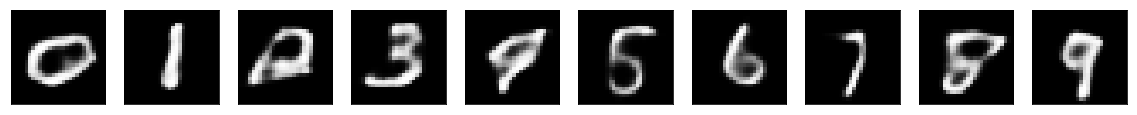

5001 [D loss: 0.672577, acc.: 69.53%] [G loss: 0.742709]
5002 [D loss: 0.684494, acc.: 57.81%] [G loss: 0.795065]
5003 [D loss: 0.690866, acc.: 56.25%] [G loss: 0.762494]
5004 [D loss: 0.685475, acc.: 57.03%] [G loss: 0.758813]
5005 [D loss: 0.691523, acc.: 55.47%] [G loss: 0.766309]
5006 [D loss: 0.679786, acc.: 59.38%] [G loss: 0.763513]
5007 [D loss: 0.692458, acc.: 53.12%] [G loss: 0.760704]
5008 [D loss: 0.678092, acc.: 61.72%] [G loss: 0.756861]
5009 [D loss: 0.682801, acc.: 57.81%] [G loss: 0.753782]
5010 [D loss: 0.681122, acc.: 63.28%] [G loss: 0.743224]
5011 [D loss: 0.681677, acc.: 58.59%] [G loss: 0.770201]
5012 [D loss: 0.675984, acc.: 61.72%] [G loss: 0.770863]
5013 [D loss: 0.683520, acc.: 53.91%] [G loss: 0.735148]
5014 [D loss: 0.685580, acc.: 50.78%] [G loss: 0.750285]
5015 [D loss: 0.683572, acc.: 53.91%] [G loss: 0.729831]
5016 [D loss: 0.675190, acc.: 64.06%] [G loss: 0.727991]
5017 [D loss: 0.690107, acc.: 54.69%] [G loss: 0.748971]
5018 [D loss: 0.674465, acc.: 6

5147 [D loss: 0.676129, acc.: 62.50%] [G loss: 0.736937]
5148 [D loss: 0.687181, acc.: 54.69%] [G loss: 0.742646]
5149 [D loss: 0.674313, acc.: 60.94%] [G loss: 0.753764]
5150 [D loss: 0.676192, acc.: 61.72%] [G loss: 0.758871]
5151 [D loss: 0.684939, acc.: 55.47%] [G loss: 0.746295]
5152 [D loss: 0.680342, acc.: 57.81%] [G loss: 0.759979]
5153 [D loss: 0.684681, acc.: 51.56%] [G loss: 0.741701]
5154 [D loss: 0.666824, acc.: 67.97%] [G loss: 0.751655]
5155 [D loss: 0.673033, acc.: 63.28%] [G loss: 0.778200]
5156 [D loss: 0.668011, acc.: 64.06%] [G loss: 0.808200]
5157 [D loss: 0.683225, acc.: 55.47%] [G loss: 0.769632]
5158 [D loss: 0.675033, acc.: 60.94%] [G loss: 0.763371]
5159 [D loss: 0.686720, acc.: 55.47%] [G loss: 0.763809]
5160 [D loss: 0.674105, acc.: 58.59%] [G loss: 0.751233]
5161 [D loss: 0.680469, acc.: 53.91%] [G loss: 0.746544]
5162 [D loss: 0.690238, acc.: 53.12%] [G loss: 0.769140]
5163 [D loss: 0.681640, acc.: 55.47%] [G loss: 0.772481]
5164 [D loss: 0.664400, acc.: 7

5295 [D loss: 0.679620, acc.: 57.81%] [G loss: 0.751535]
5296 [D loss: 0.679922, acc.: 54.69%] [G loss: 0.750575]
5297 [D loss: 0.678553, acc.: 56.25%] [G loss: 0.747922]
5298 [D loss: 0.676940, acc.: 57.81%] [G loss: 0.740915]
5299 [D loss: 0.679138, acc.: 58.59%] [G loss: 0.744052]
5300 [D loss: 0.688801, acc.: 48.44%] [G loss: 0.744100]
5301 [D loss: 0.684422, acc.: 53.12%] [G loss: 0.726092]
5302 [D loss: 0.677923, acc.: 61.72%] [G loss: 0.738809]
5303 [D loss: 0.670726, acc.: 60.16%] [G loss: 0.755090]
5304 [D loss: 0.682158, acc.: 56.25%] [G loss: 0.758389]
5305 [D loss: 0.661001, acc.: 69.53%] [G loss: 0.766456]
5306 [D loss: 0.672006, acc.: 60.16%] [G loss: 0.762760]
5307 [D loss: 0.679729, acc.: 52.34%] [G loss: 0.758886]
5308 [D loss: 0.695179, acc.: 50.78%] [G loss: 0.751529]
5309 [D loss: 0.668125, acc.: 73.44%] [G loss: 0.759833]
5310 [D loss: 0.675670, acc.: 52.34%] [G loss: 0.820837]
5311 [D loss: 0.683204, acc.: 59.38%] [G loss: 0.782042]
5312 [D loss: 0.691926, acc.: 5

5444 [D loss: 0.700187, acc.: 43.75%] [G loss: 0.790068]
5445 [D loss: 0.664414, acc.: 64.06%] [G loss: 0.806654]
5446 [D loss: 0.680316, acc.: 57.81%] [G loss: 0.787608]
5447 [D loss: 0.687230, acc.: 57.81%] [G loss: 0.762674]
5448 [D loss: 0.667960, acc.: 64.06%] [G loss: 0.759472]
5449 [D loss: 0.683044, acc.: 57.81%] [G loss: 0.765541]
5450 [D loss: 0.678434, acc.: 53.91%] [G loss: 0.757403]
5451 [D loss: 0.675515, acc.: 62.50%] [G loss: 0.765007]
5452 [D loss: 0.684655, acc.: 54.69%] [G loss: 0.780633]
5453 [D loss: 0.675141, acc.: 57.81%] [G loss: 0.777253]
5454 [D loss: 0.669422, acc.: 62.50%] [G loss: 0.769169]
5455 [D loss: 0.667815, acc.: 63.28%] [G loss: 0.750696]
5456 [D loss: 0.675006, acc.: 60.94%] [G loss: 0.746118]
5457 [D loss: 0.677557, acc.: 54.69%] [G loss: 0.762438]
5458 [D loss: 0.678490, acc.: 60.94%] [G loss: 0.755002]
5459 [D loss: 0.676539, acc.: 62.50%] [G loss: 0.751897]
5460 [D loss: 0.680646, acc.: 60.16%] [G loss: 0.758311]
5461 [D loss: 0.658645, acc.: 6

5588 [D loss: 0.683535, acc.: 52.34%] [G loss: 0.746211]
5589 [D loss: 0.676870, acc.: 59.38%] [G loss: 0.777032]
5590 [D loss: 0.683587, acc.: 48.44%] [G loss: 0.762375]
5591 [D loss: 0.679427, acc.: 57.81%] [G loss: 0.773620]
5592 [D loss: 0.690520, acc.: 50.00%] [G loss: 0.780880]
5593 [D loss: 0.675115, acc.: 58.59%] [G loss: 0.791939]
5594 [D loss: 0.675586, acc.: 53.91%] [G loss: 0.742589]
5595 [D loss: 0.682449, acc.: 49.22%] [G loss: 0.754518]
5596 [D loss: 0.678563, acc.: 57.81%] [G loss: 0.748123]
5597 [D loss: 0.678006, acc.: 61.72%] [G loss: 0.767048]
5598 [D loss: 0.686444, acc.: 61.72%] [G loss: 0.750938]
5599 [D loss: 0.674713, acc.: 56.25%] [G loss: 0.743356]
5600 [D loss: 0.684237, acc.: 53.12%] [G loss: 0.743186]
5601 [D loss: 0.674059, acc.: 61.72%] [G loss: 0.776522]
5602 [D loss: 0.672698, acc.: 63.28%] [G loss: 0.765241]
5603 [D loss: 0.675283, acc.: 57.81%] [G loss: 0.775493]
5604 [D loss: 0.677267, acc.: 57.81%] [G loss: 0.751822]
5605 [D loss: 0.672133, acc.: 6

5736 [D loss: 0.687858, acc.: 54.69%] [G loss: 0.759131]
5737 [D loss: 0.678247, acc.: 58.59%] [G loss: 0.785274]
5738 [D loss: 0.671944, acc.: 59.38%] [G loss: 0.772468]
5739 [D loss: 0.685010, acc.: 57.81%] [G loss: 0.751718]
5740 [D loss: 0.675104, acc.: 58.59%] [G loss: 0.769980]
5741 [D loss: 0.685670, acc.: 57.03%] [G loss: 0.757183]
5742 [D loss: 0.690528, acc.: 46.09%] [G loss: 0.757779]
5743 [D loss: 0.677113, acc.: 57.03%] [G loss: 0.766923]
5744 [D loss: 0.677091, acc.: 54.69%] [G loss: 0.753204]
5745 [D loss: 0.667150, acc.: 63.28%] [G loss: 0.750365]
5746 [D loss: 0.685795, acc.: 57.81%] [G loss: 0.753629]
5747 [D loss: 0.679899, acc.: 58.59%] [G loss: 0.749586]
5748 [D loss: 0.700675, acc.: 49.22%] [G loss: 0.752900]
5749 [D loss: 0.683321, acc.: 53.12%] [G loss: 0.742431]
5750 [D loss: 0.677156, acc.: 57.81%] [G loss: 0.746668]
5751 [D loss: 0.701429, acc.: 48.44%] [G loss: 0.754640]
5752 [D loss: 0.676659, acc.: 59.38%] [G loss: 0.741513]
5753 [D loss: 0.662784, acc.: 6

5883 [D loss: 0.675933, acc.: 57.81%] [G loss: 0.785104]
5884 [D loss: 0.681448, acc.: 53.91%] [G loss: 0.771193]
5885 [D loss: 0.685726, acc.: 54.69%] [G loss: 0.757618]
5886 [D loss: 0.679125, acc.: 56.25%] [G loss: 0.758426]
5887 [D loss: 0.673919, acc.: 58.59%] [G loss: 0.737153]
5888 [D loss: 0.681508, acc.: 59.38%] [G loss: 0.757537]
5889 [D loss: 0.694102, acc.: 50.78%] [G loss: 0.759045]
5890 [D loss: 0.671689, acc.: 57.81%] [G loss: 0.753238]
5891 [D loss: 0.672525, acc.: 57.03%] [G loss: 0.748049]
5892 [D loss: 0.682348, acc.: 55.47%] [G loss: 0.767304]
5893 [D loss: 0.684924, acc.: 57.03%] [G loss: 0.772028]
5894 [D loss: 0.685567, acc.: 56.25%] [G loss: 0.769895]
5895 [D loss: 0.683155, acc.: 56.25%] [G loss: 0.763826]
5896 [D loss: 0.682698, acc.: 58.59%] [G loss: 0.758781]
5897 [D loss: 0.685548, acc.: 57.03%] [G loss: 0.771443]
5898 [D loss: 0.676996, acc.: 60.16%] [G loss: 0.757708]
5899 [D loss: 0.674984, acc.: 60.16%] [G loss: 0.778394]
5900 [D loss: 0.686932, acc.: 5

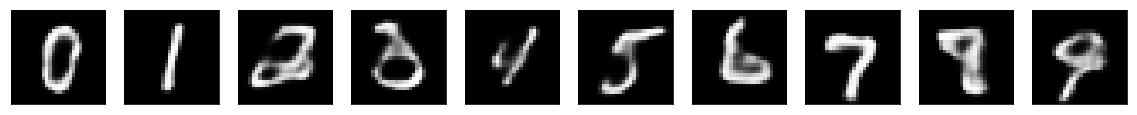

6001 [D loss: 0.662743, acc.: 64.84%] [G loss: 0.739373]
6002 [D loss: 0.672264, acc.: 60.16%] [G loss: 0.741515]
6003 [D loss: 0.692882, acc.: 50.78%] [G loss: 0.754340]
6004 [D loss: 0.668716, acc.: 67.97%] [G loss: 0.756471]
6005 [D loss: 0.674984, acc.: 60.16%] [G loss: 0.764807]
6006 [D loss: 0.684453, acc.: 53.12%] [G loss: 0.774926]
6007 [D loss: 0.680583, acc.: 52.34%] [G loss: 0.760659]
6008 [D loss: 0.691483, acc.: 50.78%] [G loss: 0.773861]
6009 [D loss: 0.689441, acc.: 52.34%] [G loss: 0.745992]
6010 [D loss: 0.688053, acc.: 53.91%] [G loss: 0.739091]
6011 [D loss: 0.659970, acc.: 68.75%] [G loss: 0.737498]
6012 [D loss: 0.690807, acc.: 46.88%] [G loss: 0.764348]
6013 [D loss: 0.691149, acc.: 52.34%] [G loss: 0.748963]
6014 [D loss: 0.667697, acc.: 66.41%] [G loss: 0.725173]
6015 [D loss: 0.700186, acc.: 43.75%] [G loss: 0.752475]
6016 [D loss: 0.690199, acc.: 57.81%] [G loss: 0.735780]
6017 [D loss: 0.682077, acc.: 56.25%] [G loss: 0.749069]
6018 [D loss: 0.681586, acc.: 6

6147 [D loss: 0.665318, acc.: 61.72%] [G loss: 0.762882]
6148 [D loss: 0.700357, acc.: 50.00%] [G loss: 0.774438]
6149 [D loss: 0.670546, acc.: 60.94%] [G loss: 0.751936]
6150 [D loss: 0.667444, acc.: 61.72%] [G loss: 0.735836]
6151 [D loss: 0.668079, acc.: 60.94%] [G loss: 0.743460]
6152 [D loss: 0.689628, acc.: 57.03%] [G loss: 0.771615]
6153 [D loss: 0.684866, acc.: 54.69%] [G loss: 0.778590]
6154 [D loss: 0.680526, acc.: 56.25%] [G loss: 0.769695]
6155 [D loss: 0.693997, acc.: 50.78%] [G loss: 0.764457]
6156 [D loss: 0.678496, acc.: 53.91%] [G loss: 0.754910]
6157 [D loss: 0.681633, acc.: 51.56%] [G loss: 0.749698]
6158 [D loss: 0.678509, acc.: 59.38%] [G loss: 0.746974]
6159 [D loss: 0.692168, acc.: 58.59%] [G loss: 0.743398]
6160 [D loss: 0.675254, acc.: 59.38%] [G loss: 0.753385]
6161 [D loss: 0.685623, acc.: 53.91%] [G loss: 0.758503]
6162 [D loss: 0.676753, acc.: 57.81%] [G loss: 0.758768]
6163 [D loss: 0.669314, acc.: 60.94%] [G loss: 0.771795]
6164 [D loss: 0.674564, acc.: 5

6296 [D loss: 0.677399, acc.: 53.12%] [G loss: 0.788448]
6297 [D loss: 0.671439, acc.: 54.69%] [G loss: 0.761168]
6298 [D loss: 0.687635, acc.: 53.91%] [G loss: 0.753229]
6299 [D loss: 0.680881, acc.: 53.91%] [G loss: 0.755958]
6300 [D loss: 0.686493, acc.: 58.59%] [G loss: 0.744315]
6301 [D loss: 0.687798, acc.: 52.34%] [G loss: 0.751990]
6302 [D loss: 0.681551, acc.: 56.25%] [G loss: 0.733266]
6303 [D loss: 0.671852, acc.: 63.28%] [G loss: 0.729669]
6304 [D loss: 0.674054, acc.: 60.94%] [G loss: 0.749300]
6305 [D loss: 0.678596, acc.: 59.38%] [G loss: 0.753559]
6306 [D loss: 0.678249, acc.: 57.03%] [G loss: 0.754263]
6307 [D loss: 0.673078, acc.: 61.72%] [G loss: 0.757903]
6308 [D loss: 0.677056, acc.: 60.16%] [G loss: 0.755694]
6309 [D loss: 0.666227, acc.: 64.06%] [G loss: 0.769707]
6310 [D loss: 0.681083, acc.: 52.34%] [G loss: 0.762015]
6311 [D loss: 0.674302, acc.: 57.81%] [G loss: 0.774792]
6312 [D loss: 0.680613, acc.: 55.47%] [G loss: 0.769041]
6313 [D loss: 0.683555, acc.: 5

6442 [D loss: 0.680156, acc.: 57.81%] [G loss: 0.757398]
6443 [D loss: 0.678360, acc.: 56.25%] [G loss: 0.749290]
6444 [D loss: 0.678729, acc.: 58.59%] [G loss: 0.756619]
6445 [D loss: 0.670814, acc.: 64.84%] [G loss: 0.756497]
6446 [D loss: 0.686138, acc.: 51.56%] [G loss: 0.748868]
6447 [D loss: 0.668925, acc.: 59.38%] [G loss: 0.758906]
6448 [D loss: 0.672887, acc.: 67.97%] [G loss: 0.782089]
6449 [D loss: 0.699441, acc.: 47.66%] [G loss: 0.780575]
6450 [D loss: 0.687964, acc.: 52.34%] [G loss: 0.771243]
6451 [D loss: 0.677862, acc.: 59.38%] [G loss: 0.745383]
6452 [D loss: 0.678950, acc.: 51.56%] [G loss: 0.738235]
6453 [D loss: 0.681108, acc.: 58.59%] [G loss: 0.744890]
6454 [D loss: 0.690283, acc.: 51.56%] [G loss: 0.743086]
6455 [D loss: 0.677791, acc.: 55.47%] [G loss: 0.747309]
6456 [D loss: 0.681458, acc.: 59.38%] [G loss: 0.736325]
6457 [D loss: 0.671647, acc.: 55.47%] [G loss: 0.748769]
6458 [D loss: 0.674433, acc.: 57.03%] [G loss: 0.767768]
6459 [D loss: 0.696665, acc.: 5

6589 [D loss: 0.684130, acc.: 53.91%] [G loss: 0.757649]
6590 [D loss: 0.687817, acc.: 53.91%] [G loss: 0.753242]
6591 [D loss: 0.677171, acc.: 60.16%] [G loss: 0.750546]
6592 [D loss: 0.680174, acc.: 60.16%] [G loss: 0.763161]
6593 [D loss: 0.681192, acc.: 55.47%] [G loss: 0.814450]
6594 [D loss: 0.687878, acc.: 51.56%] [G loss: 0.756052]
6595 [D loss: 0.675703, acc.: 57.03%] [G loss: 0.742489]
6596 [D loss: 0.686526, acc.: 53.12%] [G loss: 0.726852]
6597 [D loss: 0.682596, acc.: 53.91%] [G loss: 0.728306]
6598 [D loss: 0.697948, acc.: 54.69%] [G loss: 0.756457]
6599 [D loss: 0.689368, acc.: 50.78%] [G loss: 0.765270]
6600 [D loss: 0.683665, acc.: 53.12%] [G loss: 0.781193]
6601 [D loss: 0.691268, acc.: 54.69%] [G loss: 0.749972]
6602 [D loss: 0.672640, acc.: 57.81%] [G loss: 0.750352]
6603 [D loss: 0.696589, acc.: 46.09%] [G loss: 0.745048]
6604 [D loss: 0.676914, acc.: 57.81%] [G loss: 0.743505]
6605 [D loss: 0.677536, acc.: 56.25%] [G loss: 0.741724]
6606 [D loss: 0.681941, acc.: 5

6739 [D loss: 0.702806, acc.: 51.56%] [G loss: 0.749253]
6740 [D loss: 0.688268, acc.: 52.34%] [G loss: 0.764845]
6741 [D loss: 0.677498, acc.: 61.72%] [G loss: 0.770460]
6742 [D loss: 0.684596, acc.: 55.47%] [G loss: 0.761669]
6743 [D loss: 0.690036, acc.: 48.44%] [G loss: 0.767868]
6744 [D loss: 0.679632, acc.: 55.47%] [G loss: 0.753439]
6745 [D loss: 0.685132, acc.: 50.78%] [G loss: 0.747296]
6746 [D loss: 0.682538, acc.: 54.69%] [G loss: 0.755244]
6747 [D loss: 0.688302, acc.: 54.69%] [G loss: 0.764229]
6748 [D loss: 0.680951, acc.: 58.59%] [G loss: 0.760152]
6749 [D loss: 0.669069, acc.: 61.72%] [G loss: 0.771773]
6750 [D loss: 0.683070, acc.: 58.59%] [G loss: 0.753986]
6751 [D loss: 0.695428, acc.: 50.00%] [G loss: 0.754606]
6752 [D loss: 0.671332, acc.: 62.50%] [G loss: 0.775417]
6753 [D loss: 0.677310, acc.: 64.84%] [G loss: 0.751191]
6754 [D loss: 0.688534, acc.: 50.78%] [G loss: 0.767850]
6755 [D loss: 0.676309, acc.: 60.16%] [G loss: 0.759969]
6756 [D loss: 0.686101, acc.: 5

6885 [D loss: 0.689675, acc.: 53.12%] [G loss: 0.810789]
6886 [D loss: 0.670274, acc.: 57.03%] [G loss: 0.767340]
6887 [D loss: 0.690302, acc.: 52.34%] [G loss: 0.766185]
6888 [D loss: 0.685605, acc.: 52.34%] [G loss: 0.769177]
6889 [D loss: 0.685023, acc.: 56.25%] [G loss: 0.785045]
6890 [D loss: 0.682698, acc.: 52.34%] [G loss: 0.764626]
6891 [D loss: 0.685539, acc.: 52.34%] [G loss: 0.747800]
6892 [D loss: 0.687444, acc.: 50.78%] [G loss: 0.748841]
6893 [D loss: 0.668147, acc.: 57.81%] [G loss: 0.755656]
6894 [D loss: 0.688485, acc.: 51.56%] [G loss: 0.762467]
6895 [D loss: 0.685985, acc.: 58.59%] [G loss: 0.749286]
6896 [D loss: 0.665049, acc.: 60.94%] [G loss: 0.769881]
6897 [D loss: 0.682113, acc.: 54.69%] [G loss: 0.765357]
6898 [D loss: 0.676668, acc.: 53.91%] [G loss: 0.785780]
6899 [D loss: 0.677044, acc.: 56.25%] [G loss: 0.780837]
6900 [D loss: 0.687757, acc.: 55.47%] [G loss: 0.779451]
6901 [D loss: 0.681090, acc.: 60.16%] [G loss: 0.791575]
6902 [D loss: 0.686991, acc.: 5

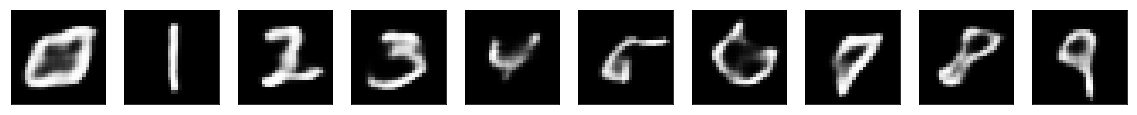

7001 [D loss: 0.678182, acc.: 61.72%] [G loss: 0.739462]
7002 [D loss: 0.688358, acc.: 53.12%] [G loss: 0.738588]
7003 [D loss: 0.678165, acc.: 58.59%] [G loss: 0.755685]
7004 [D loss: 0.680405, acc.: 63.28%] [G loss: 0.786428]
7005 [D loss: 0.673134, acc.: 61.72%] [G loss: 0.783076]
7006 [D loss: 0.683709, acc.: 53.12%] [G loss: 0.747441]
7007 [D loss: 0.674325, acc.: 62.50%] [G loss: 0.749130]
7008 [D loss: 0.667873, acc.: 67.19%] [G loss: 0.745153]
7009 [D loss: 0.672400, acc.: 61.72%] [G loss: 0.763963]
7010 [D loss: 0.662520, acc.: 57.03%] [G loss: 0.780997]
7011 [D loss: 0.676541, acc.: 58.59%] [G loss: 0.774062]
7012 [D loss: 0.679734, acc.: 57.03%] [G loss: 0.747521]
7013 [D loss: 0.696043, acc.: 52.34%] [G loss: 0.750811]
7014 [D loss: 0.681429, acc.: 60.94%] [G loss: 0.740220]
7015 [D loss: 0.684427, acc.: 50.00%] [G loss: 0.769302]
7016 [D loss: 0.681982, acc.: 57.03%] [G loss: 0.783200]
7017 [D loss: 0.683813, acc.: 55.47%] [G loss: 0.763724]
7018 [D loss: 0.695387, acc.: 4

7149 [D loss: 0.685456, acc.: 64.06%] [G loss: 0.746192]
7150 [D loss: 0.674457, acc.: 57.03%] [G loss: 0.754380]
7151 [D loss: 0.677480, acc.: 59.38%] [G loss: 0.751052]
7152 [D loss: 0.685304, acc.: 53.91%] [G loss: 0.745348]
7153 [D loss: 0.668654, acc.: 63.28%] [G loss: 0.748132]
7154 [D loss: 0.674208, acc.: 60.16%] [G loss: 0.755545]
7155 [D loss: 0.666696, acc.: 64.06%] [G loss: 0.749225]
7156 [D loss: 0.674415, acc.: 65.62%] [G loss: 0.745124]
7157 [D loss: 0.677692, acc.: 57.81%] [G loss: 0.756758]
7158 [D loss: 0.673586, acc.: 60.16%] [G loss: 0.740260]
7159 [D loss: 0.672669, acc.: 64.06%] [G loss: 0.754077]
7160 [D loss: 0.687681, acc.: 54.69%] [G loss: 0.755396]
7161 [D loss: 0.684555, acc.: 53.12%] [G loss: 0.736241]
7162 [D loss: 0.688878, acc.: 57.03%] [G loss: 0.757300]
7163 [D loss: 0.667791, acc.: 60.16%] [G loss: 0.766452]
7164 [D loss: 0.678007, acc.: 57.03%] [G loss: 0.751901]
7165 [D loss: 0.684401, acc.: 50.78%] [G loss: 0.756177]
7166 [D loss: 0.679843, acc.: 5

7293 [D loss: 0.679096, acc.: 57.81%] [G loss: 0.750366]
7294 [D loss: 0.675393, acc.: 57.03%] [G loss: 0.746362]
7295 [D loss: 0.674955, acc.: 57.81%] [G loss: 0.767002]
7296 [D loss: 0.680882, acc.: 54.69%] [G loss: 0.761479]
7297 [D loss: 0.678061, acc.: 59.38%] [G loss: 0.795236]
7298 [D loss: 0.691159, acc.: 53.12%] [G loss: 0.758252]
7299 [D loss: 0.679740, acc.: 56.25%] [G loss: 0.739677]
7300 [D loss: 0.670625, acc.: 62.50%] [G loss: 0.745039]
7301 [D loss: 0.694182, acc.: 57.81%] [G loss: 0.752266]
7302 [D loss: 0.690072, acc.: 51.56%] [G loss: 0.769106]
7303 [D loss: 0.667515, acc.: 59.38%] [G loss: 0.749747]
7304 [D loss: 0.675034, acc.: 56.25%] [G loss: 0.746197]
7305 [D loss: 0.676649, acc.: 60.94%] [G loss: 0.758816]
7306 [D loss: 0.677687, acc.: 52.34%] [G loss: 0.769162]
7307 [D loss: 0.673210, acc.: 57.81%] [G loss: 0.786012]
7308 [D loss: 0.683360, acc.: 56.25%] [G loss: 0.787434]
7309 [D loss: 0.677200, acc.: 56.25%] [G loss: 0.786449]
7310 [D loss: 0.692860, acc.: 5

7441 [D loss: 0.674388, acc.: 60.16%] [G loss: 0.767479]
7442 [D loss: 0.686117, acc.: 55.47%] [G loss: 0.745756]
7443 [D loss: 0.675073, acc.: 61.72%] [G loss: 0.741194]
7444 [D loss: 0.669397, acc.: 63.28%] [G loss: 0.736383]
7445 [D loss: 0.688843, acc.: 53.12%] [G loss: 0.779997]
7446 [D loss: 0.682426, acc.: 53.91%] [G loss: 0.809760]
7447 [D loss: 0.691440, acc.: 46.09%] [G loss: 0.753613]
7448 [D loss: 0.671364, acc.: 61.72%] [G loss: 0.753286]
7449 [D loss: 0.675377, acc.: 59.38%] [G loss: 0.764153]
7450 [D loss: 0.682842, acc.: 49.22%] [G loss: 0.749587]
7451 [D loss: 0.678950, acc.: 58.59%] [G loss: 0.754265]
7452 [D loss: 0.678351, acc.: 57.81%] [G loss: 0.760025]
7453 [D loss: 0.665839, acc.: 63.28%] [G loss: 0.752656]
7454 [D loss: 0.686654, acc.: 57.03%] [G loss: 0.745853]
7455 [D loss: 0.678914, acc.: 56.25%] [G loss: 0.764995]
7456 [D loss: 0.684193, acc.: 58.59%] [G loss: 0.756620]
7457 [D loss: 0.679537, acc.: 62.50%] [G loss: 0.738689]
7458 [D loss: 0.679229, acc.: 5

7588 [D loss: 0.675779, acc.: 57.03%] [G loss: 0.749975]
7589 [D loss: 0.666534, acc.: 64.06%] [G loss: 0.749884]
7590 [D loss: 0.673528, acc.: 60.16%] [G loss: 0.752630]
7591 [D loss: 0.679778, acc.: 55.47%] [G loss: 0.748779]
7592 [D loss: 0.676771, acc.: 60.94%] [G loss: 0.769795]
7593 [D loss: 0.684019, acc.: 51.56%] [G loss: 0.759061]
7594 [D loss: 0.678999, acc.: 53.91%] [G loss: 0.781112]
7595 [D loss: 0.666443, acc.: 59.38%] [G loss: 0.749835]
7596 [D loss: 0.672792, acc.: 57.81%] [G loss: 0.759916]
7597 [D loss: 0.672851, acc.: 64.06%] [G loss: 0.754104]
7598 [D loss: 0.696136, acc.: 50.78%] [G loss: 0.770487]
7599 [D loss: 0.675569, acc.: 58.59%] [G loss: 0.762754]
7600 [D loss: 0.695216, acc.: 50.00%] [G loss: 0.757157]
7601 [D loss: 0.679313, acc.: 53.12%] [G loss: 0.783196]
7602 [D loss: 0.691549, acc.: 51.56%] [G loss: 0.783746]
7603 [D loss: 0.674825, acc.: 55.47%] [G loss: 0.759478]
7604 [D loss: 0.680931, acc.: 58.59%] [G loss: 0.751015]
7605 [D loss: 0.689071, acc.: 5

7732 [D loss: 0.675251, acc.: 56.25%] [G loss: 0.776342]
7733 [D loss: 0.683575, acc.: 54.69%] [G loss: 0.772519]
7734 [D loss: 0.674533, acc.: 57.81%] [G loss: 0.757685]
7735 [D loss: 0.672642, acc.: 63.28%] [G loss: 0.757713]
7736 [D loss: 0.676305, acc.: 63.28%] [G loss: 0.762775]
7737 [D loss: 0.688813, acc.: 53.12%] [G loss: 0.752327]
7738 [D loss: 0.675793, acc.: 53.91%] [G loss: 0.771376]
7739 [D loss: 0.666884, acc.: 60.16%] [G loss: 0.762536]
7740 [D loss: 0.680737, acc.: 53.12%] [G loss: 0.776219]
7741 [D loss: 0.680401, acc.: 57.81%] [G loss: 0.779231]
7742 [D loss: 0.682565, acc.: 60.16%] [G loss: 0.765900]
7743 [D loss: 0.674447, acc.: 62.50%] [G loss: 0.752662]
7744 [D loss: 0.681054, acc.: 57.03%] [G loss: 0.755567]
7745 [D loss: 0.679938, acc.: 59.38%] [G loss: 0.766055]
7746 [D loss: 0.685639, acc.: 57.81%] [G loss: 0.767197]
7747 [D loss: 0.671612, acc.: 63.28%] [G loss: 0.753559]
7748 [D loss: 0.669109, acc.: 56.25%] [G loss: 0.748810]
7749 [D loss: 0.684017, acc.: 5

7878 [D loss: 0.698951, acc.: 50.00%] [G loss: 0.760697]
7879 [D loss: 0.683173, acc.: 52.34%] [G loss: 0.742778]
7880 [D loss: 0.674912, acc.: 61.72%] [G loss: 0.756444]
7881 [D loss: 0.686192, acc.: 60.16%] [G loss: 0.746378]
7882 [D loss: 0.686941, acc.: 51.56%] [G loss: 0.748199]
7883 [D loss: 0.683110, acc.: 58.59%] [G loss: 0.738947]
7884 [D loss: 0.677461, acc.: 53.91%] [G loss: 0.749394]
7885 [D loss: 0.682354, acc.: 57.03%] [G loss: 0.733430]
7886 [D loss: 0.688781, acc.: 57.81%] [G loss: 0.759173]
7887 [D loss: 0.685151, acc.: 56.25%] [G loss: 0.784170]
7888 [D loss: 0.680379, acc.: 60.16%] [G loss: 0.777867]
7889 [D loss: 0.676003, acc.: 58.59%] [G loss: 0.746397]
7890 [D loss: 0.658800, acc.: 71.09%] [G loss: 0.745684]
7891 [D loss: 0.688940, acc.: 55.47%] [G loss: 0.750662]
7892 [D loss: 0.685679, acc.: 55.47%] [G loss: 0.749107]
7893 [D loss: 0.678162, acc.: 59.38%] [G loss: 0.759299]
7894 [D loss: 0.693163, acc.: 50.78%] [G loss: 0.752765]
7895 [D loss: 0.684900, acc.: 5

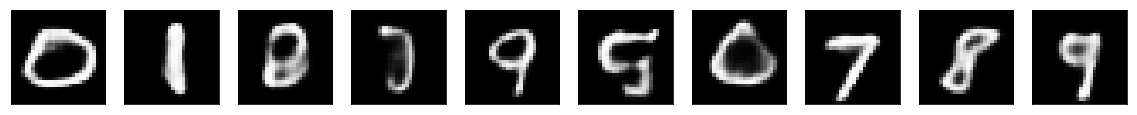

8001 [D loss: 0.683562, acc.: 48.44%] [G loss: 0.755712]
8002 [D loss: 0.678568, acc.: 57.03%] [G loss: 0.767686]
8003 [D loss: 0.676374, acc.: 54.69%] [G loss: 0.757148]
8004 [D loss: 0.687991, acc.: 51.56%] [G loss: 0.752979]
8005 [D loss: 0.678728, acc.: 58.59%] [G loss: 0.738092]
8006 [D loss: 0.689214, acc.: 57.03%] [G loss: 0.749437]
8007 [D loss: 0.671211, acc.: 60.94%] [G loss: 0.747776]
8008 [D loss: 0.684099, acc.: 50.00%] [G loss: 0.759082]
8009 [D loss: 0.681621, acc.: 51.56%] [G loss: 0.778924]
8010 [D loss: 0.677989, acc.: 57.03%] [G loss: 0.784118]
8011 [D loss: 0.680468, acc.: 55.47%] [G loss: 0.771590]
8012 [D loss: 0.674826, acc.: 60.16%] [G loss: 0.768642]
8013 [D loss: 0.678292, acc.: 56.25%] [G loss: 0.774482]
8014 [D loss: 0.673657, acc.: 57.81%] [G loss: 0.772590]
8015 [D loss: 0.669604, acc.: 56.25%] [G loss: 0.766036]
8016 [D loss: 0.686669, acc.: 49.22%] [G loss: 0.765186]
8017 [D loss: 0.680577, acc.: 54.69%] [G loss: 0.747806]
8018 [D loss: 0.673283, acc.: 5

8147 [D loss: 0.679218, acc.: 58.59%] [G loss: 0.757364]
8148 [D loss: 0.669873, acc.: 64.06%] [G loss: 0.758038]
8149 [D loss: 0.684331, acc.: 51.56%] [G loss: 0.766302]
8150 [D loss: 0.663401, acc.: 68.75%] [G loss: 0.741980]
8151 [D loss: 0.673344, acc.: 64.84%] [G loss: 0.743215]
8152 [D loss: 0.667440, acc.: 60.94%] [G loss: 0.744804]
8153 [D loss: 0.694574, acc.: 49.22%] [G loss: 0.764137]
8154 [D loss: 0.691124, acc.: 51.56%] [G loss: 0.755308]
8155 [D loss: 0.669381, acc.: 56.25%] [G loss: 0.788402]
8156 [D loss: 0.683544, acc.: 56.25%] [G loss: 0.789984]
8157 [D loss: 0.681550, acc.: 60.94%] [G loss: 0.740919]
8158 [D loss: 0.693223, acc.: 50.00%] [G loss: 0.749631]
8159 [D loss: 0.687224, acc.: 53.12%] [G loss: 0.738846]
8160 [D loss: 0.682894, acc.: 57.03%] [G loss: 0.754605]
8161 [D loss: 0.676214, acc.: 60.94%] [G loss: 0.771359]
8162 [D loss: 0.667017, acc.: 61.72%] [G loss: 0.751796]
8163 [D loss: 0.689120, acc.: 55.47%] [G loss: 0.758367]
8164 [D loss: 0.683980, acc.: 5

8295 [D loss: 0.680935, acc.: 60.16%] [G loss: 0.777177]
8296 [D loss: 0.671112, acc.: 64.84%] [G loss: 0.789747]
8297 [D loss: 0.688888, acc.: 57.81%] [G loss: 0.795675]
8298 [D loss: 0.687781, acc.: 49.22%] [G loss: 0.744218]
8299 [D loss: 0.675758, acc.: 59.38%] [G loss: 0.745790]
8300 [D loss: 0.680101, acc.: 57.03%] [G loss: 0.745968]
8301 [D loss: 0.691108, acc.: 54.69%] [G loss: 0.751988]
8302 [D loss: 0.677034, acc.: 58.59%] [G loss: 0.745786]
8303 [D loss: 0.679541, acc.: 55.47%] [G loss: 0.748766]
8304 [D loss: 0.672332, acc.: 59.38%] [G loss: 0.739616]
8305 [D loss: 0.695399, acc.: 53.12%] [G loss: 0.756849]
8306 [D loss: 0.657889, acc.: 64.84%] [G loss: 0.754275]
8307 [D loss: 0.681033, acc.: 53.91%] [G loss: 0.754119]
8308 [D loss: 0.678928, acc.: 55.47%] [G loss: 0.742749]
8309 [D loss: 0.681848, acc.: 53.91%] [G loss: 0.783444]
8310 [D loss: 0.673052, acc.: 60.16%] [G loss: 0.771694]
8311 [D loss: 0.680290, acc.: 57.81%] [G loss: 0.765266]
8312 [D loss: 0.683442, acc.: 6

8444 [D loss: 0.671138, acc.: 60.94%] [G loss: 0.740696]
8445 [D loss: 0.664722, acc.: 63.28%] [G loss: 0.745543]
8446 [D loss: 0.684437, acc.: 57.03%] [G loss: 0.738643]
8447 [D loss: 0.669027, acc.: 60.16%] [G loss: 0.754079]
8448 [D loss: 0.683584, acc.: 55.47%] [G loss: 0.757798]
8449 [D loss: 0.684360, acc.: 53.91%] [G loss: 0.795973]
8450 [D loss: 0.678392, acc.: 56.25%] [G loss: 0.797174]
8451 [D loss: 0.681669, acc.: 54.69%] [G loss: 0.768246]
8452 [D loss: 0.677039, acc.: 57.81%] [G loss: 0.753851]
8453 [D loss: 0.701576, acc.: 52.34%] [G loss: 0.746946]
8454 [D loss: 0.686810, acc.: 49.22%] [G loss: 0.749532]
8455 [D loss: 0.686703, acc.: 54.69%] [G loss: 0.758804]
8456 [D loss: 0.679324, acc.: 58.59%] [G loss: 0.757192]
8457 [D loss: 0.681411, acc.: 50.78%] [G loss: 0.779834]
8458 [D loss: 0.670212, acc.: 57.03%] [G loss: 0.775999]
8459 [D loss: 0.667419, acc.: 55.47%] [G loss: 0.761202]
8460 [D loss: 0.674543, acc.: 59.38%] [G loss: 0.751275]
8461 [D loss: 0.699701, acc.: 4

8589 [D loss: 0.666847, acc.: 61.72%] [G loss: 0.760267]
8590 [D loss: 0.685800, acc.: 53.91%] [G loss: 0.760298]
8591 [D loss: 0.681047, acc.: 57.03%] [G loss: 0.746218]
8592 [D loss: 0.674365, acc.: 57.81%] [G loss: 0.743011]
8593 [D loss: 0.685724, acc.: 52.34%] [G loss: 0.762305]
8594 [D loss: 0.679874, acc.: 60.16%] [G loss: 0.769222]
8595 [D loss: 0.675265, acc.: 56.25%] [G loss: 0.786009]
8596 [D loss: 0.664192, acc.: 66.41%] [G loss: 0.787231]
8597 [D loss: 0.679513, acc.: 54.69%] [G loss: 0.772634]
8598 [D loss: 0.673649, acc.: 59.38%] [G loss: 0.766136]
8599 [D loss: 0.692405, acc.: 54.69%] [G loss: 0.760993]
8600 [D loss: 0.679365, acc.: 53.12%] [G loss: 0.759016]
8601 [D loss: 0.686001, acc.: 53.12%] [G loss: 0.753779]
8602 [D loss: 0.670786, acc.: 58.59%] [G loss: 0.762090]
8603 [D loss: 0.673383, acc.: 58.59%] [G loss: 0.734063]
8604 [D loss: 0.686695, acc.: 53.12%] [G loss: 0.756033]
8605 [D loss: 0.669866, acc.: 57.03%] [G loss: 0.763285]
8606 [D loss: 0.668725, acc.: 6

8733 [D loss: 0.680976, acc.: 53.12%] [G loss: 0.753434]
8734 [D loss: 0.688599, acc.: 52.34%] [G loss: 0.752467]
8735 [D loss: 0.676649, acc.: 53.12%] [G loss: 0.763939]
8736 [D loss: 0.696764, acc.: 51.56%] [G loss: 0.777213]
8737 [D loss: 0.676216, acc.: 57.03%] [G loss: 0.755299]
8738 [D loss: 0.672103, acc.: 55.47%] [G loss: 0.750533]
8739 [D loss: 0.686523, acc.: 53.12%] [G loss: 0.765695]
8740 [D loss: 0.680207, acc.: 56.25%] [G loss: 0.779617]
8741 [D loss: 0.672804, acc.: 59.38%] [G loss: 0.768916]
8742 [D loss: 0.679458, acc.: 55.47%] [G loss: 0.746604]
8743 [D loss: 0.679282, acc.: 61.72%] [G loss: 0.764361]
8744 [D loss: 0.682935, acc.: 58.59%] [G loss: 0.772852]
8745 [D loss: 0.678414, acc.: 57.03%] [G loss: 0.771578]
8746 [D loss: 0.679704, acc.: 57.81%] [G loss: 0.761526]
8747 [D loss: 0.674801, acc.: 54.69%] [G loss: 0.770427]
8748 [D loss: 0.687904, acc.: 47.66%] [G loss: 0.754038]
8749 [D loss: 0.685991, acc.: 59.38%] [G loss: 0.767715]
8750 [D loss: 0.676517, acc.: 5

8878 [D loss: 0.680111, acc.: 53.91%] [G loss: 0.747219]
8879 [D loss: 0.683856, acc.: 57.81%] [G loss: 0.760276]
8880 [D loss: 0.686182, acc.: 56.25%] [G loss: 0.766125]
8881 [D loss: 0.683682, acc.: 54.69%] [G loss: 0.761248]
8882 [D loss: 0.671217, acc.: 65.62%] [G loss: 0.751262]
8883 [D loss: 0.674780, acc.: 57.81%] [G loss: 0.759852]
8884 [D loss: 0.669630, acc.: 60.94%] [G loss: 0.762748]
8885 [D loss: 0.680843, acc.: 54.69%] [G loss: 0.759862]
8886 [D loss: 0.680465, acc.: 53.12%] [G loss: 0.757762]
8887 [D loss: 0.669429, acc.: 56.25%] [G loss: 0.754395]
8888 [D loss: 0.669740, acc.: 57.81%] [G loss: 0.736218]
8889 [D loss: 0.676327, acc.: 56.25%] [G loss: 0.744843]
8890 [D loss: 0.673555, acc.: 55.47%] [G loss: 0.758286]
8891 [D loss: 0.665978, acc.: 60.16%] [G loss: 0.782697]
8892 [D loss: 0.677445, acc.: 60.94%] [G loss: 0.784304]
8893 [D loss: 0.681371, acc.: 56.25%] [G loss: 0.753163]
8894 [D loss: 0.682988, acc.: 58.59%] [G loss: 0.736708]
8895 [D loss: 0.680281, acc.: 5

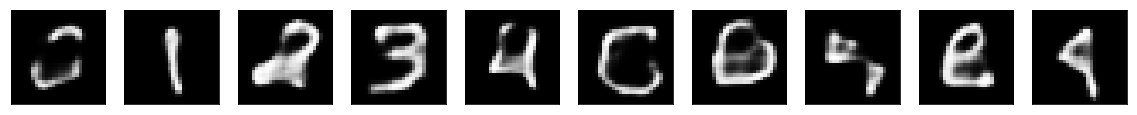

9001 [D loss: 0.684116, acc.: 54.69%] [G loss: 0.748383]
9002 [D loss: 0.674391, acc.: 56.25%] [G loss: 0.762074]
9003 [D loss: 0.682474, acc.: 58.59%] [G loss: 0.757199]
9004 [D loss: 0.687242, acc.: 53.91%] [G loss: 0.760027]
9005 [D loss: 0.672683, acc.: 58.59%] [G loss: 0.750149]
9006 [D loss: 0.680979, acc.: 54.69%] [G loss: 0.776690]
9007 [D loss: 0.688340, acc.: 50.00%] [G loss: 0.784541]
9008 [D loss: 0.672296, acc.: 57.03%] [G loss: 0.752683]
9009 [D loss: 0.687453, acc.: 50.78%] [G loss: 0.746573]
9010 [D loss: 0.680311, acc.: 50.00%] [G loss: 0.751744]
9011 [D loss: 0.675077, acc.: 54.69%] [G loss: 0.766441]
9012 [D loss: 0.684489, acc.: 53.91%] [G loss: 0.769464]
9013 [D loss: 0.666588, acc.: 60.16%] [G loss: 0.744558]
9014 [D loss: 0.685653, acc.: 57.81%] [G loss: 0.751307]
9015 [D loss: 0.686353, acc.: 56.25%] [G loss: 0.758728]
9016 [D loss: 0.693394, acc.: 52.34%] [G loss: 0.751949]
9017 [D loss: 0.666064, acc.: 58.59%] [G loss: 0.748832]
9018 [D loss: 0.682906, acc.: 5

9149 [D loss: 0.688676, acc.: 50.00%] [G loss: 0.805860]
9150 [D loss: 0.675444, acc.: 53.12%] [G loss: 0.757954]
9151 [D loss: 0.670552, acc.: 57.81%] [G loss: 0.763714]
9152 [D loss: 0.697766, acc.: 47.66%] [G loss: 0.759135]
9153 [D loss: 0.675165, acc.: 56.25%] [G loss: 0.759159]
9154 [D loss: 0.683779, acc.: 57.81%] [G loss: 0.756790]
9155 [D loss: 0.694037, acc.: 51.56%] [G loss: 0.773170]
9156 [D loss: 0.681781, acc.: 60.94%] [G loss: 0.764945]
9157 [D loss: 0.676713, acc.: 57.81%] [G loss: 0.762486]
9158 [D loss: 0.690343, acc.: 53.12%] [G loss: 0.763939]
9159 [D loss: 0.680296, acc.: 56.25%] [G loss: 0.752404]
9160 [D loss: 0.672923, acc.: 60.94%] [G loss: 0.761839]
9161 [D loss: 0.675620, acc.: 53.91%] [G loss: 0.757024]
9162 [D loss: 0.667230, acc.: 64.84%] [G loss: 0.762098]
9163 [D loss: 0.685612, acc.: 54.69%] [G loss: 0.758096]
9164 [D loss: 0.675573, acc.: 57.03%] [G loss: 0.746735]
9165 [D loss: 0.674466, acc.: 60.16%] [G loss: 0.756324]
9166 [D loss: 0.688076, acc.: 5

9297 [D loss: 0.675026, acc.: 58.59%] [G loss: 0.792935]
9298 [D loss: 0.693471, acc.: 56.25%] [G loss: 0.765578]
9299 [D loss: 0.674505, acc.: 58.59%] [G loss: 0.756729]
9300 [D loss: 0.679296, acc.: 55.47%] [G loss: 0.752674]
9301 [D loss: 0.688124, acc.: 50.78%] [G loss: 0.762598]
9302 [D loss: 0.671833, acc.: 64.84%] [G loss: 0.768448]
9303 [D loss: 0.683740, acc.: 50.78%] [G loss: 0.758182]
9304 [D loss: 0.691143, acc.: 55.47%] [G loss: 0.762270]
9305 [D loss: 0.672996, acc.: 61.72%] [G loss: 0.771756]
9306 [D loss: 0.679538, acc.: 57.03%] [G loss: 0.760909]
9307 [D loss: 0.677937, acc.: 58.59%] [G loss: 0.767225]
9308 [D loss: 0.678779, acc.: 58.59%] [G loss: 0.757145]
9309 [D loss: 0.685743, acc.: 51.56%] [G loss: 0.759111]
9310 [D loss: 0.681199, acc.: 52.34%] [G loss: 0.762404]
9311 [D loss: 0.674326, acc.: 56.25%] [G loss: 0.765129]
9312 [D loss: 0.667136, acc.: 62.50%] [G loss: 0.759126]
9313 [D loss: 0.652919, acc.: 58.59%] [G loss: 0.753507]
9314 [D loss: 0.687277, acc.: 5

9440 [D loss: 0.683886, acc.: 53.91%] [G loss: 0.760183]
9441 [D loss: 0.698209, acc.: 50.00%] [G loss: 0.752542]
9442 [D loss: 0.682935, acc.: 59.38%] [G loss: 0.770801]
9443 [D loss: 0.669639, acc.: 53.12%] [G loss: 0.746427]
9444 [D loss: 0.679354, acc.: 54.69%] [G loss: 0.754315]
9445 [D loss: 0.680333, acc.: 56.25%] [G loss: 0.744900]
9446 [D loss: 0.680501, acc.: 55.47%] [G loss: 0.750239]
9447 [D loss: 0.685828, acc.: 51.56%] [G loss: 0.767758]
9448 [D loss: 0.667620, acc.: 61.72%] [G loss: 0.734512]
9449 [D loss: 0.667323, acc.: 63.28%] [G loss: 0.749965]
9450 [D loss: 0.676170, acc.: 57.81%] [G loss: 0.755865]
9451 [D loss: 0.680556, acc.: 60.16%] [G loss: 0.743059]
9452 [D loss: 0.683335, acc.: 53.12%] [G loss: 0.741500]
9453 [D loss: 0.684346, acc.: 56.25%] [G loss: 0.742343]
9454 [D loss: 0.675228, acc.: 57.03%] [G loss: 0.744462]
9455 [D loss: 0.677173, acc.: 57.81%] [G loss: 0.774312]
9456 [D loss: 0.676678, acc.: 60.94%] [G loss: 0.760481]
9457 [D loss: 0.686748, acc.: 5

9587 [D loss: 0.672334, acc.: 60.16%] [G loss: 0.784206]
9588 [D loss: 0.668591, acc.: 58.59%] [G loss: 0.773183]
9589 [D loss: 0.673152, acc.: 53.91%] [G loss: 0.766098]
9590 [D loss: 0.665497, acc.: 62.50%] [G loss: 0.775772]
9591 [D loss: 0.668450, acc.: 57.03%] [G loss: 0.797555]
9592 [D loss: 0.672378, acc.: 57.81%] [G loss: 0.768700]
9593 [D loss: 0.678921, acc.: 57.03%] [G loss: 0.756838]
9594 [D loss: 0.679900, acc.: 57.03%] [G loss: 0.746667]
9595 [D loss: 0.668393, acc.: 61.72%] [G loss: 0.746903]
9596 [D loss: 0.689038, acc.: 55.47%] [G loss: 0.741119]
9597 [D loss: 0.682816, acc.: 54.69%] [G loss: 0.750012]
9598 [D loss: 0.680446, acc.: 53.91%] [G loss: 0.752000]
9599 [D loss: 0.686306, acc.: 53.91%] [G loss: 0.762622]
9600 [D loss: 0.686275, acc.: 52.34%] [G loss: 0.766642]
9601 [D loss: 0.667507, acc.: 57.81%] [G loss: 0.769990]
9602 [D loss: 0.660688, acc.: 66.41%] [G loss: 0.769845]
9603 [D loss: 0.681788, acc.: 56.25%] [G loss: 0.745278]
9604 [D loss: 0.691929, acc.: 5

9738 [D loss: 0.690267, acc.: 46.09%] [G loss: 0.757000]
9739 [D loss: 0.668027, acc.: 56.25%] [G loss: 0.765086]
9740 [D loss: 0.692888, acc.: 47.66%] [G loss: 0.806796]
9741 [D loss: 0.674146, acc.: 56.25%] [G loss: 0.802830]
9742 [D loss: 0.681764, acc.: 55.47%] [G loss: 0.775083]
9743 [D loss: 0.675152, acc.: 55.47%] [G loss: 0.776444]
9744 [D loss: 0.679526, acc.: 59.38%] [G loss: 0.753831]
9745 [D loss: 0.662456, acc.: 67.19%] [G loss: 0.756970]
9746 [D loss: 0.673116, acc.: 55.47%] [G loss: 0.773413]
9747 [D loss: 0.683819, acc.: 55.47%] [G loss: 0.784018]
9748 [D loss: 0.687111, acc.: 51.56%] [G loss: 0.756210]
9749 [D loss: 0.682110, acc.: 57.03%] [G loss: 0.770167]
9750 [D loss: 0.668744, acc.: 55.47%] [G loss: 0.793067]
9751 [D loss: 0.683347, acc.: 54.69%] [G loss: 0.761505]
9752 [D loss: 0.679101, acc.: 61.72%] [G loss: 0.767906]
9753 [D loss: 0.672989, acc.: 58.59%] [G loss: 0.776257]
9754 [D loss: 0.669686, acc.: 57.81%] [G loss: 0.758003]
9755 [D loss: 0.666704, acc.: 6

9886 [D loss: 0.678406, acc.: 60.16%] [G loss: 0.758034]
9887 [D loss: 0.684135, acc.: 59.38%] [G loss: 0.762556]
9888 [D loss: 0.677405, acc.: 60.16%] [G loss: 0.762706]
9889 [D loss: 0.677652, acc.: 58.59%] [G loss: 0.758516]
9890 [D loss: 0.682338, acc.: 48.44%] [G loss: 0.755630]
9891 [D loss: 0.670738, acc.: 59.38%] [G loss: 0.758155]
9892 [D loss: 0.672759, acc.: 56.25%] [G loss: 0.757036]
9893 [D loss: 0.686408, acc.: 53.12%] [G loss: 0.767857]
9894 [D loss: 0.700700, acc.: 46.09%] [G loss: 0.770738]
9895 [D loss: 0.672400, acc.: 58.59%] [G loss: 0.750341]
9896 [D loss: 0.681288, acc.: 57.81%] [G loss: 0.759144]
9897 [D loss: 0.687931, acc.: 57.03%] [G loss: 0.786050]
9898 [D loss: 0.680063, acc.: 57.03%] [G loss: 0.750275]
9899 [D loss: 0.676694, acc.: 58.59%] [G loss: 0.765043]
9900 [D loss: 0.668365, acc.: 57.81%] [G loss: 0.746621]
9901 [D loss: 0.688660, acc.: 51.56%] [G loss: 0.752224]
9902 [D loss: 0.674346, acc.: 57.81%] [G loss: 0.759919]
9903 [D loss: 0.684668, acc.: 5

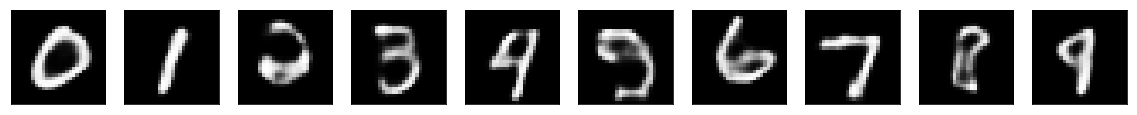

10001 [D loss: 0.698623, acc.: 45.31%] [G loss: 0.754295]
10002 [D loss: 0.671181, acc.: 63.28%] [G loss: 0.770276]
10003 [D loss: 0.670252, acc.: 57.81%] [G loss: 0.755630]
10004 [D loss: 0.689269, acc.: 50.78%] [G loss: 0.758998]
10005 [D loss: 0.670775, acc.: 61.72%] [G loss: 0.753499]
10006 [D loss: 0.681738, acc.: 57.81%] [G loss: 0.761144]
10007 [D loss: 0.685345, acc.: 57.81%] [G loss: 0.764658]
10008 [D loss: 0.679698, acc.: 53.91%] [G loss: 0.772457]
10009 [D loss: 0.671771, acc.: 60.16%] [G loss: 0.807755]
10010 [D loss: 0.665298, acc.: 60.16%] [G loss: 0.764822]
10011 [D loss: 0.690650, acc.: 51.56%] [G loss: 0.779490]
10012 [D loss: 0.688843, acc.: 54.69%] [G loss: 0.751569]
10013 [D loss: 0.680264, acc.: 50.78%] [G loss: 0.764234]
10014 [D loss: 0.687691, acc.: 54.69%] [G loss: 0.754704]
10015 [D loss: 0.687571, acc.: 45.31%] [G loss: 0.765086]
10016 [D loss: 0.674899, acc.: 56.25%] [G loss: 0.729670]
10017 [D loss: 0.681393, acc.: 59.38%] [G loss: 0.750784]
10018 [D loss:

10144 [D loss: 0.685130, acc.: 53.12%] [G loss: 0.757558]
10145 [D loss: 0.664373, acc.: 60.16%] [G loss: 0.750889]
10146 [D loss: 0.676117, acc.: 53.12%] [G loss: 0.765564]
10147 [D loss: 0.686976, acc.: 53.12%] [G loss: 0.760759]
10148 [D loss: 0.665740, acc.: 58.59%] [G loss: 0.751612]
10149 [D loss: 0.670000, acc.: 58.59%] [G loss: 0.761850]
10150 [D loss: 0.683080, acc.: 52.34%] [G loss: 0.760991]
10151 [D loss: 0.679314, acc.: 60.94%] [G loss: 0.777946]
10152 [D loss: 0.687311, acc.: 56.25%] [G loss: 0.764477]
10153 [D loss: 0.689838, acc.: 47.66%] [G loss: 0.763309]
10154 [D loss: 0.680240, acc.: 57.81%] [G loss: 0.755093]
10155 [D loss: 0.677823, acc.: 57.81%] [G loss: 0.751188]
10156 [D loss: 0.686229, acc.: 53.12%] [G loss: 0.761380]
10157 [D loss: 0.680439, acc.: 56.25%] [G loss: 0.765228]
10158 [D loss: 0.692458, acc.: 53.12%] [G loss: 0.750201]
10159 [D loss: 0.675889, acc.: 54.69%] [G loss: 0.762641]
10160 [D loss: 0.673668, acc.: 63.28%] [G loss: 0.760580]
10161 [D loss:

10289 [D loss: 0.676274, acc.: 57.81%] [G loss: 0.780474]
10290 [D loss: 0.680388, acc.: 54.69%] [G loss: 0.761285]
10291 [D loss: 0.684977, acc.: 58.59%] [G loss: 0.766866]
10292 [D loss: 0.686657, acc.: 57.03%] [G loss: 0.745649]
10293 [D loss: 0.691507, acc.: 53.12%] [G loss: 0.760954]
10294 [D loss: 0.672091, acc.: 57.81%] [G loss: 0.786081]
10295 [D loss: 0.683595, acc.: 53.91%] [G loss: 0.769469]
10296 [D loss: 0.678541, acc.: 52.34%] [G loss: 0.745595]
10297 [D loss: 0.683772, acc.: 50.00%] [G loss: 0.744441]
10298 [D loss: 0.667853, acc.: 56.25%] [G loss: 0.747973]
10299 [D loss: 0.679675, acc.: 53.91%] [G loss: 0.743324]
10300 [D loss: 0.694455, acc.: 50.00%] [G loss: 0.750522]
10301 [D loss: 0.673158, acc.: 57.03%] [G loss: 0.751564]
10302 [D loss: 0.686753, acc.: 52.34%] [G loss: 0.742079]
10303 [D loss: 0.656446, acc.: 60.16%] [G loss: 0.755356]
10304 [D loss: 0.673896, acc.: 60.94%] [G loss: 0.747426]
10305 [D loss: 0.669121, acc.: 60.16%] [G loss: 0.745538]
10306 [D loss:

10437 [D loss: 0.666374, acc.: 58.59%] [G loss: 0.761450]
10438 [D loss: 0.676269, acc.: 58.59%] [G loss: 0.751799]
10439 [D loss: 0.682492, acc.: 50.00%] [G loss: 0.767715]
10440 [D loss: 0.680103, acc.: 56.25%] [G loss: 0.757033]
10441 [D loss: 0.680290, acc.: 57.81%] [G loss: 0.740424]
10442 [D loss: 0.682254, acc.: 56.25%] [G loss: 0.766560]
10443 [D loss: 0.673780, acc.: 60.94%] [G loss: 0.766733]
10444 [D loss: 0.677450, acc.: 57.03%] [G loss: 0.768205]
10445 [D loss: 0.667243, acc.: 58.59%] [G loss: 0.750972]
10446 [D loss: 0.679624, acc.: 64.06%] [G loss: 0.756573]
10447 [D loss: 0.673981, acc.: 58.59%] [G loss: 0.758703]
10448 [D loss: 0.677398, acc.: 60.16%] [G loss: 0.759979]
10449 [D loss: 0.687185, acc.: 53.91%] [G loss: 0.761314]
10450 [D loss: 0.682110, acc.: 53.12%] [G loss: 0.779438]
10451 [D loss: 0.676800, acc.: 53.12%] [G loss: 0.769968]
10452 [D loss: 0.672835, acc.: 60.94%] [G loss: 0.755521]
10453 [D loss: 0.670609, acc.: 63.28%] [G loss: 0.769982]
10454 [D loss:

10581 [D loss: 0.679773, acc.: 47.66%] [G loss: 0.749249]
10582 [D loss: 0.677450, acc.: 53.91%] [G loss: 0.764934]
10583 [D loss: 0.665128, acc.: 59.38%] [G loss: 0.770237]
10584 [D loss: 0.692791, acc.: 52.34%] [G loss: 0.753674]
10585 [D loss: 0.676298, acc.: 54.69%] [G loss: 0.764240]
10586 [D loss: 0.681565, acc.: 56.25%] [G loss: 0.763197]
10587 [D loss: 0.683527, acc.: 50.00%] [G loss: 0.751515]
10588 [D loss: 0.671926, acc.: 56.25%] [G loss: 0.759374]
10589 [D loss: 0.690982, acc.: 52.34%] [G loss: 0.756944]
10590 [D loss: 0.679743, acc.: 58.59%] [G loss: 0.750625]
10591 [D loss: 0.669177, acc.: 54.69%] [G loss: 0.765049]
10592 [D loss: 0.685032, acc.: 50.00%] [G loss: 0.758210]
10593 [D loss: 0.674701, acc.: 54.69%] [G loss: 0.742544]
10594 [D loss: 0.670431, acc.: 56.25%] [G loss: 0.757900]
10595 [D loss: 0.691799, acc.: 53.12%] [G loss: 0.749511]
10596 [D loss: 0.683499, acc.: 49.22%] [G loss: 0.745633]
10597 [D loss: 0.677902, acc.: 57.03%] [G loss: 0.760179]
10598 [D loss:

10727 [D loss: 0.688659, acc.: 50.78%] [G loss: 0.750616]
10728 [D loss: 0.663095, acc.: 60.94%] [G loss: 0.760928]
10729 [D loss: 0.671671, acc.: 59.38%] [G loss: 0.743910]
10730 [D loss: 0.678485, acc.: 53.91%] [G loss: 0.756663]
10731 [D loss: 0.676550, acc.: 57.03%] [G loss: 0.773334]
10732 [D loss: 0.655136, acc.: 62.50%] [G loss: 0.769893]
10733 [D loss: 0.702706, acc.: 46.88%] [G loss: 0.769230]
10734 [D loss: 0.656625, acc.: 63.28%] [G loss: 0.772769]
10735 [D loss: 0.694752, acc.: 53.12%] [G loss: 0.791167]
10736 [D loss: 0.700750, acc.: 46.09%] [G loss: 0.782171]
10737 [D loss: 0.688574, acc.: 52.34%] [G loss: 0.752751]
10738 [D loss: 0.671551, acc.: 57.03%] [G loss: 0.779605]
10739 [D loss: 0.690408, acc.: 45.31%] [G loss: 0.780969]
10740 [D loss: 0.678785, acc.: 61.72%] [G loss: 0.776450]
10741 [D loss: 0.685536, acc.: 60.16%] [G loss: 0.770193]
10742 [D loss: 0.678237, acc.: 53.91%] [G loss: 0.754851]
10743 [D loss: 0.685899, acc.: 52.34%] [G loss: 0.755335]
10744 [D loss:

10871 [D loss: 0.665437, acc.: 60.94%] [G loss: 0.745170]
10872 [D loss: 0.683727, acc.: 54.69%] [G loss: 0.751251]
10873 [D loss: 0.685951, acc.: 53.12%] [G loss: 0.764133]
10874 [D loss: 0.669706, acc.: 64.06%] [G loss: 0.760222]
10875 [D loss: 0.674956, acc.: 55.47%] [G loss: 0.751289]
10876 [D loss: 0.674140, acc.: 61.72%] [G loss: 0.766985]
10877 [D loss: 0.679333, acc.: 58.59%] [G loss: 0.762926]
10878 [D loss: 0.656226, acc.: 63.28%] [G loss: 0.758190]
10879 [D loss: 0.665143, acc.: 57.03%] [G loss: 0.760870]
10880 [D loss: 0.688568, acc.: 48.44%] [G loss: 0.771452]
10881 [D loss: 0.681988, acc.: 54.69%] [G loss: 0.776203]
10882 [D loss: 0.689774, acc.: 53.12%] [G loss: 0.757114]
10883 [D loss: 0.691088, acc.: 51.56%] [G loss: 0.761070]
10884 [D loss: 0.671000, acc.: 61.72%] [G loss: 0.760857]
10885 [D loss: 0.662896, acc.: 62.50%] [G loss: 0.760223]
10886 [D loss: 0.682839, acc.: 57.81%] [G loss: 0.763235]
10887 [D loss: 0.683723, acc.: 53.12%] [G loss: 0.738696]
10888 [D loss:

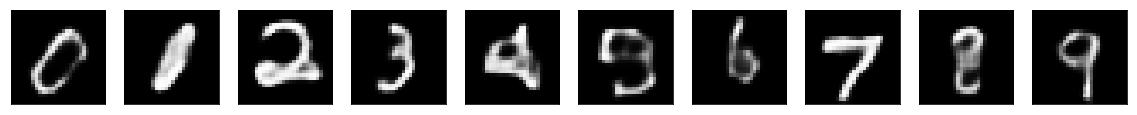

11001 [D loss: 0.676777, acc.: 53.12%] [G loss: 0.784510]
11002 [D loss: 0.686666, acc.: 50.00%] [G loss: 0.785858]
11003 [D loss: 0.687436, acc.: 53.12%] [G loss: 0.801613]
11004 [D loss: 0.682291, acc.: 56.25%] [G loss: 0.763674]
11005 [D loss: 0.685278, acc.: 52.34%] [G loss: 0.754108]
11006 [D loss: 0.675536, acc.: 56.25%] [G loss: 0.761587]
11007 [D loss: 0.675987, acc.: 53.91%] [G loss: 0.775366]
11008 [D loss: 0.671672, acc.: 58.59%] [G loss: 0.771334]
11009 [D loss: 0.680773, acc.: 54.69%] [G loss: 0.761093]
11010 [D loss: 0.682248, acc.: 54.69%] [G loss: 0.781914]
11011 [D loss: 0.682728, acc.: 54.69%] [G loss: 0.761784]
11012 [D loss: 0.689558, acc.: 51.56%] [G loss: 0.755845]
11013 [D loss: 0.659509, acc.: 64.84%] [G loss: 0.758356]
11014 [D loss: 0.679951, acc.: 55.47%] [G loss: 0.760505]
11015 [D loss: 0.680961, acc.: 56.25%] [G loss: 0.736163]
11016 [D loss: 0.688269, acc.: 57.03%] [G loss: 0.746207]
11017 [D loss: 0.689398, acc.: 43.75%] [G loss: 0.774164]
11018 [D loss:

11146 [D loss: 0.677967, acc.: 52.34%] [G loss: 0.768106]
11147 [D loss: 0.678880, acc.: 59.38%] [G loss: 0.762309]
11148 [D loss: 0.662919, acc.: 59.38%] [G loss: 0.767263]
11149 [D loss: 0.688366, acc.: 49.22%] [G loss: 0.743474]
11150 [D loss: 0.692434, acc.: 48.44%] [G loss: 0.742025]
11151 [D loss: 0.685129, acc.: 50.78%] [G loss: 0.757654]
11152 [D loss: 0.672397, acc.: 55.47%] [G loss: 0.766795]
11153 [D loss: 0.671356, acc.: 57.81%] [G loss: 0.767314]
11154 [D loss: 0.680320, acc.: 51.56%] [G loss: 0.758862]
11155 [D loss: 0.675572, acc.: 60.16%] [G loss: 0.761609]
11156 [D loss: 0.673910, acc.: 55.47%] [G loss: 0.763870]
11157 [D loss: 0.661273, acc.: 61.72%] [G loss: 0.769205]
11158 [D loss: 0.685389, acc.: 53.91%] [G loss: 0.766940]
11159 [D loss: 0.668761, acc.: 59.38%] [G loss: 0.757690]
11160 [D loss: 0.677563, acc.: 59.38%] [G loss: 0.757280]
11161 [D loss: 0.684568, acc.: 57.03%] [G loss: 0.772540]
11162 [D loss: 0.673336, acc.: 60.94%] [G loss: 0.776795]
11163 [D loss:

11292 [D loss: 0.657428, acc.: 64.06%] [G loss: 0.760973]
11293 [D loss: 0.675867, acc.: 56.25%] [G loss: 0.774796]
11294 [D loss: 0.665065, acc.: 64.06%] [G loss: 0.780659]
11295 [D loss: 0.682547, acc.: 52.34%] [G loss: 0.757638]
11296 [D loss: 0.672001, acc.: 55.47%] [G loss: 0.761762]
11297 [D loss: 0.672903, acc.: 60.16%] [G loss: 0.757374]
11298 [D loss: 0.685859, acc.: 52.34%] [G loss: 0.754548]
11299 [D loss: 0.683086, acc.: 53.91%] [G loss: 0.761109]
11300 [D loss: 0.697435, acc.: 46.88%] [G loss: 0.763013]
11301 [D loss: 0.667001, acc.: 57.81%] [G loss: 0.761432]
11302 [D loss: 0.679857, acc.: 56.25%] [G loss: 0.758181]
11303 [D loss: 0.665099, acc.: 60.94%] [G loss: 0.761970]
11304 [D loss: 0.683083, acc.: 53.91%] [G loss: 0.776737]
11305 [D loss: 0.666743, acc.: 62.50%] [G loss: 0.756926]
11306 [D loss: 0.687680, acc.: 52.34%] [G loss: 0.762177]
11307 [D loss: 0.657461, acc.: 63.28%] [G loss: 0.786783]
11308 [D loss: 0.684308, acc.: 52.34%] [G loss: 0.792203]
11309 [D loss:

11437 [D loss: 0.680295, acc.: 52.34%] [G loss: 0.775743]
11438 [D loss: 0.669504, acc.: 62.50%] [G loss: 0.756192]
11439 [D loss: 0.677026, acc.: 56.25%] [G loss: 0.780637]
11440 [D loss: 0.671883, acc.: 49.22%] [G loss: 0.783906]
11441 [D loss: 0.686432, acc.: 52.34%] [G loss: 0.791562]
11442 [D loss: 0.671765, acc.: 53.12%] [G loss: 0.773457]
11443 [D loss: 0.677298, acc.: 51.56%] [G loss: 0.767946]
11444 [D loss: 0.683298, acc.: 52.34%] [G loss: 0.772907]
11445 [D loss: 0.693364, acc.: 53.91%] [G loss: 0.765561]
11446 [D loss: 0.690034, acc.: 52.34%] [G loss: 0.786021]
11447 [D loss: 0.664749, acc.: 64.06%] [G loss: 0.780199]
11448 [D loss: 0.660694, acc.: 62.50%] [G loss: 0.761152]
11449 [D loss: 0.677051, acc.: 57.03%] [G loss: 0.777158]
11450 [D loss: 0.684966, acc.: 53.12%] [G loss: 0.798531]
11451 [D loss: 0.675267, acc.: 55.47%] [G loss: 0.796116]
11452 [D loss: 0.671638, acc.: 58.59%] [G loss: 0.768397]
11453 [D loss: 0.689952, acc.: 45.31%] [G loss: 0.803904]
11454 [D loss:

11584 [D loss: 0.656113, acc.: 60.94%] [G loss: 0.779389]
11585 [D loss: 0.671506, acc.: 57.81%] [G loss: 0.767657]
11586 [D loss: 0.671237, acc.: 58.59%] [G loss: 0.759944]
11587 [D loss: 0.685695, acc.: 55.47%] [G loss: 0.779208]
11588 [D loss: 0.691347, acc.: 54.69%] [G loss: 0.773413]
11589 [D loss: 0.676998, acc.: 61.72%] [G loss: 0.766206]
11590 [D loss: 0.658753, acc.: 66.41%] [G loss: 0.756609]
11591 [D loss: 0.694747, acc.: 48.44%] [G loss: 0.762729]
11592 [D loss: 0.672686, acc.: 59.38%] [G loss: 0.756825]
11593 [D loss: 0.664521, acc.: 59.38%] [G loss: 0.747542]
11594 [D loss: 0.657880, acc.: 64.06%] [G loss: 0.751360]
11595 [D loss: 0.664808, acc.: 56.25%] [G loss: 0.753531]
11596 [D loss: 0.683628, acc.: 50.00%] [G loss: 0.751079]
11597 [D loss: 0.667090, acc.: 60.16%] [G loss: 0.764947]
11598 [D loss: 0.690612, acc.: 49.22%] [G loss: 0.768061]
11599 [D loss: 0.679036, acc.: 51.56%] [G loss: 0.763559]
11600 [D loss: 0.683179, acc.: 53.12%] [G loss: 0.762881]
11601 [D loss:

11726 [D loss: 0.680317, acc.: 54.69%] [G loss: 0.761928]
11727 [D loss: 0.676031, acc.: 57.81%] [G loss: 0.760901]
11728 [D loss: 0.680818, acc.: 54.69%] [G loss: 0.752928]
11729 [D loss: 0.684313, acc.: 56.25%] [G loss: 0.770301]
11730 [D loss: 0.670919, acc.: 60.94%] [G loss: 0.767109]
11731 [D loss: 0.692137, acc.: 52.34%] [G loss: 0.772439]
11732 [D loss: 0.670465, acc.: 57.03%] [G loss: 0.750052]
11733 [D loss: 0.675441, acc.: 61.72%] [G loss: 0.759030]
11734 [D loss: 0.688953, acc.: 54.69%] [G loss: 0.759819]
11735 [D loss: 0.674678, acc.: 56.25%] [G loss: 0.779777]
11736 [D loss: 0.669258, acc.: 57.81%] [G loss: 0.765780]
11737 [D loss: 0.682986, acc.: 48.44%] [G loss: 0.779724]
11738 [D loss: 0.663781, acc.: 57.81%] [G loss: 0.763406]
11739 [D loss: 0.694961, acc.: 53.12%] [G loss: 0.769071]
11740 [D loss: 0.700716, acc.: 43.75%] [G loss: 0.770370]
11741 [D loss: 0.675040, acc.: 57.03%] [G loss: 0.763119]
11742 [D loss: 0.689391, acc.: 53.12%] [G loss: 0.768322]
11743 [D loss:

11870 [D loss: 0.682216, acc.: 52.34%] [G loss: 0.774827]
11871 [D loss: 0.681616, acc.: 54.69%] [G loss: 0.770047]
11872 [D loss: 0.674985, acc.: 57.81%] [G loss: 0.769479]
11873 [D loss: 0.669769, acc.: 64.84%] [G loss: 0.767295]
11874 [D loss: 0.681741, acc.: 50.78%] [G loss: 0.783953]
11875 [D loss: 0.677760, acc.: 58.59%] [G loss: 0.764788]
11876 [D loss: 0.660228, acc.: 54.69%] [G loss: 0.754486]
11877 [D loss: 0.679570, acc.: 60.16%] [G loss: 0.765939]
11878 [D loss: 0.680991, acc.: 50.00%] [G loss: 0.778938]
11879 [D loss: 0.657814, acc.: 66.41%] [G loss: 0.778221]
11880 [D loss: 0.683307, acc.: 55.47%] [G loss: 0.778391]
11881 [D loss: 0.690708, acc.: 52.34%] [G loss: 0.745789]
11882 [D loss: 0.670023, acc.: 60.16%] [G loss: 0.766968]
11883 [D loss: 0.685250, acc.: 56.25%] [G loss: 0.755341]
11884 [D loss: 0.694163, acc.: 53.91%] [G loss: 0.760023]
11885 [D loss: 0.680694, acc.: 50.00%] [G loss: 0.756273]
11886 [D loss: 0.674742, acc.: 52.34%] [G loss: 0.759280]
11887 [D loss:

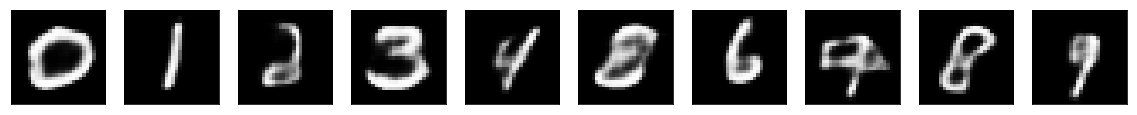

12001 [D loss: 0.668565, acc.: 59.38%] [G loss: 0.763357]
12002 [D loss: 0.659841, acc.: 58.59%] [G loss: 0.756664]
12003 [D loss: 0.673408, acc.: 56.25%] [G loss: 0.741010]
12004 [D loss: 0.696142, acc.: 49.22%] [G loss: 0.759037]
12005 [D loss: 0.686660, acc.: 52.34%] [G loss: 0.744513]
12006 [D loss: 0.668659, acc.: 60.94%] [G loss: 0.749821]
12007 [D loss: 0.667854, acc.: 59.38%] [G loss: 0.757817]
12008 [D loss: 0.664557, acc.: 58.59%] [G loss: 0.748874]
12009 [D loss: 0.674928, acc.: 57.03%] [G loss: 0.756889]
12010 [D loss: 0.681645, acc.: 52.34%] [G loss: 0.751029]
12011 [D loss: 0.674857, acc.: 57.81%] [G loss: 0.786842]
12012 [D loss: 0.667171, acc.: 64.84%] [G loss: 0.774022]
12013 [D loss: 0.671701, acc.: 60.94%] [G loss: 0.740798]
12014 [D loss: 0.672559, acc.: 57.81%] [G loss: 0.753929]
12015 [D loss: 0.665197, acc.: 61.72%] [G loss: 0.748254]
12016 [D loss: 0.679145, acc.: 60.16%] [G loss: 0.762613]
12017 [D loss: 0.656365, acc.: 53.91%] [G loss: 0.735792]
12018 [D loss:

12145 [D loss: 0.667973, acc.: 62.50%] [G loss: 0.760046]
12146 [D loss: 0.686386, acc.: 53.91%] [G loss: 0.768678]
12147 [D loss: 0.683350, acc.: 53.91%] [G loss: 0.763567]
12148 [D loss: 0.676344, acc.: 53.91%] [G loss: 0.752166]
12149 [D loss: 0.684293, acc.: 50.00%] [G loss: 0.742368]
12150 [D loss: 0.679678, acc.: 55.47%] [G loss: 0.763708]
12151 [D loss: 0.678258, acc.: 57.81%] [G loss: 0.759135]
12152 [D loss: 0.686363, acc.: 50.78%] [G loss: 0.762745]
12153 [D loss: 0.661728, acc.: 59.38%] [G loss: 0.766657]
12154 [D loss: 0.665289, acc.: 60.16%] [G loss: 0.756225]
12155 [D loss: 0.665758, acc.: 58.59%] [G loss: 0.752481]
12156 [D loss: 0.669472, acc.: 63.28%] [G loss: 0.768607]
12157 [D loss: 0.708161, acc.: 45.31%] [G loss: 0.766199]
12158 [D loss: 0.664755, acc.: 60.16%] [G loss: 0.770312]
12159 [D loss: 0.678368, acc.: 59.38%] [G loss: 0.763338]
12160 [D loss: 0.676977, acc.: 53.12%] [G loss: 0.771668]
12161 [D loss: 0.680600, acc.: 53.12%] [G loss: 0.759263]
12162 [D loss:

12291 [D loss: 0.690296, acc.: 50.00%] [G loss: 0.771488]
12292 [D loss: 0.662807, acc.: 63.28%] [G loss: 0.775682]
12293 [D loss: 0.669403, acc.: 49.22%] [G loss: 0.781187]
12294 [D loss: 0.665267, acc.: 57.81%] [G loss: 0.769807]
12295 [D loss: 0.678323, acc.: 53.91%] [G loss: 0.770669]
12296 [D loss: 0.681240, acc.: 56.25%] [G loss: 0.770831]
12297 [D loss: 0.664656, acc.: 67.19%] [G loss: 0.783331]
12298 [D loss: 0.664236, acc.: 61.72%] [G loss: 0.806273]
12299 [D loss: 0.689075, acc.: 53.91%] [G loss: 0.785833]
12300 [D loss: 0.679518, acc.: 54.69%] [G loss: 0.773765]
12301 [D loss: 0.683001, acc.: 56.25%] [G loss: 0.796630]
12302 [D loss: 0.674624, acc.: 60.16%] [G loss: 0.801246]
12303 [D loss: 0.674196, acc.: 49.22%] [G loss: 0.787217]
12304 [D loss: 0.665653, acc.: 60.94%] [G loss: 0.763903]
12305 [D loss: 0.674674, acc.: 55.47%] [G loss: 0.774690]
12306 [D loss: 0.691498, acc.: 46.09%] [G loss: 0.768081]
12307 [D loss: 0.700963, acc.: 53.12%] [G loss: 0.757399]
12308 [D loss:

12435 [D loss: 0.672036, acc.: 54.69%] [G loss: 0.763010]
12436 [D loss: 0.689435, acc.: 49.22%] [G loss: 0.763190]
12437 [D loss: 0.680497, acc.: 57.81%] [G loss: 0.761000]
12438 [D loss: 0.675852, acc.: 55.47%] [G loss: 0.776682]
12439 [D loss: 0.687292, acc.: 52.34%] [G loss: 0.754707]
12440 [D loss: 0.681548, acc.: 55.47%] [G loss: 0.775809]
12441 [D loss: 0.685207, acc.: 51.56%] [G loss: 0.797502]
12442 [D loss: 0.673393, acc.: 61.72%] [G loss: 0.784550]
12443 [D loss: 0.691534, acc.: 50.78%] [G loss: 0.796005]
12444 [D loss: 0.668951, acc.: 60.16%] [G loss: 0.820566]
12445 [D loss: 0.661652, acc.: 60.16%] [G loss: 0.777274]
12446 [D loss: 0.682481, acc.: 51.56%] [G loss: 0.769988]
12447 [D loss: 0.682234, acc.: 53.12%] [G loss: 0.766371]
12448 [D loss: 0.672957, acc.: 60.94%] [G loss: 0.789991]
12449 [D loss: 0.677021, acc.: 56.25%] [G loss: 0.782227]
12450 [D loss: 0.670283, acc.: 50.00%] [G loss: 0.784145]
12451 [D loss: 0.657591, acc.: 67.19%] [G loss: 0.785810]
12452 [D loss:

12579 [D loss: 0.655100, acc.: 60.16%] [G loss: 0.770397]
12580 [D loss: 0.695435, acc.: 48.44%] [G loss: 0.766981]
12581 [D loss: 0.693927, acc.: 46.88%] [G loss: 0.790648]
12582 [D loss: 0.675897, acc.: 53.91%] [G loss: 0.772846]
12583 [D loss: 0.675713, acc.: 56.25%] [G loss: 0.774722]
12584 [D loss: 0.679980, acc.: 53.91%] [G loss: 0.779835]
12585 [D loss: 0.676325, acc.: 53.12%] [G loss: 0.787281]
12586 [D loss: 0.689316, acc.: 50.78%] [G loss: 0.768123]
12587 [D loss: 0.694588, acc.: 51.56%] [G loss: 0.781802]
12588 [D loss: 0.675544, acc.: 49.22%] [G loss: 0.773786]
12589 [D loss: 0.683147, acc.: 49.22%] [G loss: 0.767030]
12590 [D loss: 0.690671, acc.: 50.00%] [G loss: 0.779563]
12591 [D loss: 0.660677, acc.: 58.59%] [G loss: 0.781859]
12592 [D loss: 0.684124, acc.: 56.25%] [G loss: 0.766445]
12593 [D loss: 0.692989, acc.: 53.12%] [G loss: 0.780477]
12594 [D loss: 0.681950, acc.: 52.34%] [G loss: 0.757179]
12595 [D loss: 0.686928, acc.: 49.22%] [G loss: 0.779663]
12596 [D loss:

12723 [D loss: 0.677190, acc.: 55.47%] [G loss: 0.772988]
12724 [D loss: 0.657840, acc.: 61.72%] [G loss: 0.752193]
12725 [D loss: 0.694905, acc.: 51.56%] [G loss: 0.754598]
12726 [D loss: 0.701826, acc.: 53.12%] [G loss: 0.752924]
12727 [D loss: 0.664878, acc.: 56.25%] [G loss: 0.777653]
12728 [D loss: 0.682757, acc.: 52.34%] [G loss: 0.779869]
12729 [D loss: 0.675137, acc.: 58.59%] [G loss: 0.773273]
12730 [D loss: 0.679504, acc.: 57.03%] [G loss: 0.744108]
12731 [D loss: 0.679458, acc.: 50.78%] [G loss: 0.752489]
12732 [D loss: 0.667854, acc.: 56.25%] [G loss: 0.760118]
12733 [D loss: 0.666720, acc.: 60.16%] [G loss: 0.771287]
12734 [D loss: 0.683394, acc.: 53.91%] [G loss: 0.783824]
12735 [D loss: 0.675143, acc.: 58.59%] [G loss: 0.773378]
12736 [D loss: 0.670789, acc.: 53.91%] [G loss: 0.772462]
12737 [D loss: 0.676229, acc.: 60.94%] [G loss: 0.764342]
12738 [D loss: 0.683884, acc.: 51.56%] [G loss: 0.759354]
12739 [D loss: 0.668895, acc.: 58.59%] [G loss: 0.764432]
12740 [D loss:

In [ ]:
import matplotlib.pyplot as plt

discriminator_input_dim = (64,)
generator_input_dim = (100,)
cond_input_dim = (10,)
batch_size = 128
epochs = 18000

discriminator_input = Input(shape=discriminator_input_dim)
generator_input = Input(shape=generator_input_dim)
cond_input = Input(shape=cond_input_dim)

def custom_activation(x):
    return (K.sigmoid(x) * 3) 

def discriminator(x, cond):
    concat = Concatenate(axis=-1)([x, cond])
    hidden1 = Dense(256, activation="relu")(concat)
    hidden2 = Dense(256, activation="relu")(hidden1)
    return Dense(1, activation="sigmoid")(hidden2)
    
def generator(x, cond):
    concat = Concatenate(axis=-1)([x, cond])
    hidden1 = Dense(256, activation="relu")(concat)
    hidden2 = Dense(256, activation="relu")(hidden1)
    return Dense(64, activation=custom_activation)(hidden2)

def random_input_batch_with_class(labels):
    labels_array = []
    noises = []
    for a in labels:
        noise = np.random.normal(0, 1, (100))
        noises.append(noise)
        cond = np.zeros(10)
        cond[a] = 1
        labels_array.append(cond)
    return (np.array(noises), np.array(labels_array))


generator_model = Model([generator_input, cond_input], generator(generator_input, cond_input))
discriminator_model = Model([discriminator_input, cond_input], discriminator(discriminator_input, cond_input))
discriminator_model.compile(loss='binary_crossentropy', optimizer="adadelta", metrics=['accuracy'])
generator_model.compile(loss='binary_crossentropy', optimizer="adadelta")

img = generator_model([generator_input, cond_input])
discriminator_model.trainable = False
valid = discriminator_model([img, cond_input])

double_model = Model([generator_input, cond_input], valid)
double_model.compile(loss='binary_crossentropy', optimizer="adadelta")

X_train = data_x.reshape(60000, 64)
half_batch = int(batch_size / 2)
for epoch in range(epochs):  
    if epoch % 1000 == 1:
        n = 10
        plt.figure(figsize=(20, 4))
        for i in range(n):
            ax = plt.subplot(2, n, i + 1)
            aa, bb = random_input_batch_with_class([i])
            plt.imshow(decoder.predict(generator_model.predict([aa, bb]).reshape((1,4,4,4))).reshape(28, 28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.gray()
        plt.show()
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    labels = y_train[idx]
    label_array = []
    for label in labels:
        cond = np.zeros(10)
        cond[label] = 1
        label_array.append(cond)
    imgs, imgs_labels = X_train[idx], np.array(label_array)
    noise, noise_labels = random_input_batch_with_class(labels)
    gen_imgs = generator_model.predict([noise, noise_labels])

    d_loss_real = discriminator_model.train_on_batch([imgs, imgs_labels], np.ones((half_batch, 1)))
    d_loss_fake = discriminator_model.train_on_batch([gen_imgs, noise_labels], np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    labels = np.concatenate([labels, labels])
    noise, noise_labels = random_input_batch_with_class(labels)
    g_loss = double_model.train_on_batch([noise, noise_labels], np.ones((batch_size, 1)))

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

In [ ]:
import json
with open('generator_cgan.json', 'w') as outfile:
    outfile.write(generator_model.to_json())
with open('discriminator_cgan.json', 'w') as outfile:
    outfile.write(discriminator_model.to_json())

generator_model.save_weights("generator_cgan.h5")
discriminator_model.save_weights("discriminator_cgan.h5")